###  CASE STUDY Telecom Churn assignment

# Understanding the Business Objective and the Data
- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import classification_report,accuracy_score

In [2]:
#loading the data
tele_df=pd.read_csv('telecom_churn_data_assignment.csv')

In [3]:
#preview the shape of dataset
tele_df.shape

(99999, 226)

In [4]:
#drop duplicates if any
tele_df.drop_duplicates(inplace=True)

In [5]:
tele_df.shape

(99999, 226)

In [6]:
#all the mobile numbers are unique no duplicate data
tele_df['mobile_number'].nunique()

99999

In [7]:
#preview of data
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [8]:
#check the datatype of the columns
tele_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [9]:
#renaming month name to numbers (jun-6,jul-7...) to make columns consistent
tele_df.rename({'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},axis=1,inplace=True)

In [10]:
## convert columns to appropriate formats
#converting last date of month, date of last recharge columns to datettime format
tele_df['last_date_of_month_6']=pd.to_datetime(tele_df['last_date_of_month_6'])
tele_df['date_of_last_rech_6']=pd.to_datetime(tele_df['date_of_last_rech_6'])
tele_df['last_date_of_month_7']=pd.to_datetime(tele_df['last_date_of_month_7'])
tele_df['date_of_last_rech_7']=pd.to_datetime(tele_df['date_of_last_rech_7'])
tele_df['last_date_of_month_8']=pd.to_datetime(tele_df['last_date_of_month_8'])
tele_df['date_of_last_rech_8']=pd.to_datetime(tele_df['date_of_last_rech_8'])

In [11]:
#filling the missing values with previous columns data, as missing values indicate recharge not done in that month 
tele_df[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']]=tele_df[['last_date_of_month_6',
                                    'last_date_of_month_7','last_date_of_month_8']].fillna(method = 'ffill')

In [12]:
#percentage of missing values 
missing_data=round(100*(tele_df.isna().sum()/len(tele_df.index)),2)
missing_data

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
vbc_3g_8          0.00
vbc_3g_7          0.00
vbc_3g_6          0.00
vbc_3g_9          0.00
Length: 226, dtype: float64

In [13]:
#columns having more than 60% missing values
missing_data[missing_data>=60]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [14]:
# list of columns containing recharge amount
recharge_amt_cols =  tele_df.columns[tele_df.columns.str.contains('rech_amt|rech_data')]
recharge_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [15]:
#percentage of missing value in recharge amt related columns
missing_data[recharge_amt_cols]

total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
dtype: float64

In [16]:
#previewing recharge related columns
tele_df[recharge_amt_cols]

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,...,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,...,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,74,384,283,121,44,154,65,50,NaN,7/25/2014,...,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,168,315,116,358,86,200,86,100,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,230,310,601,410,60,50,50,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196,350,287,200,56,110,110,50,6/4/2014,NaN,...,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,60,110,0,50,60,110,0,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,110,110,182,30,110,110,149,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,119,0,0,0,50,0,0,0,6/13/2014,NaN,...,NaN,NaN,25.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN
99997,381,358,716,862,202,179,179,252,6/17/2014,7/19/2014,...,4.0,4.0,202.0,179.0,179.0,252.0,583.0,358.0,716.0,862.0


In [17]:
#imputing NaN values of rech amt with zero since no data indicates no recharge has done
tele_df['total_rech_data_6']=tele_df['total_rech_data_6'].fillna(0)
tele_df['total_rech_data_7']=tele_df['total_rech_data_7'].fillna(0)
tele_df['total_rech_data_8']=tele_df['total_rech_data_8'].fillna(0)
tele_df['total_rech_data_9']=tele_df['total_rech_data_9'].fillna(0)
tele_df['av_rech_amt_data_6']=tele_df['av_rech_amt_data_6'].fillna(0)
tele_df['av_rech_amt_data_7']=tele_df['av_rech_amt_data_7'].fillna(0)
tele_df['av_rech_amt_data_8']=tele_df['av_rech_amt_data_8'].fillna(0)
tele_df['av_rech_amt_data_9']=tele_df['av_rech_amt_data_9'].fillna(0)

##### Relations
- total recharge amount=total_rech_amt+total_rech_data_amt
- total recharge data=total_rech_data*av_rech_amt_data
- Total recharge amount logic = Total data recharge + Total recharge Amount.
- average recharge amount in good phase = (total_recharge_amount_6+total_recharge_amount_7)/2

In [18]:
tele_df['total_rech_amt_6']=tele_df['total_rech_amt_6']+tele_df['av_rech_amt_data_6']*tele_df['total_rech_data_6']
tele_df['total_rech_amt_7']=tele_df['total_rech_amt_7']+tele_df['av_rech_amt_data_7']*tele_df['total_rech_data_7']
tele_df['total_rech_amt_8']=tele_df['total_rech_amt_8']+tele_df['av_rech_amt_data_8']*tele_df['total_rech_data_8']


### Derive new features

In [19]:
#deriving a new columns which has the days since last recharge for month
tele_df['days_last_recharge']=(tele_df['last_date_of_month_8']-tele_df['date_of_last_rech_8']).apply(lambda x:x.days)

In [20]:
#droping columns related to last date of month and last date of recharge as information is in derived variable
tele_df.drop(['last_date_of_month_'+str(i) for i in [6,7,8]],axis=1,inplace=True)
tele_df.drop(['date_of_last_rech_data_'+str(i) for i in [6,7,8]],axis=1,inplace=True)
tele_df.drop(['date_of_last_rech_'+str(i) for i in [6,7,8]],axis=1,inplace=True)

### Filter high-value customers

- As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [21]:
#creating a new column having values of average of total recharge of month 6 and 7
tele_df['avg_recharge_amt_good_phase']=(tele_df['total_rech_amt_6']+tele_df['total_rech_amt_7'])/2

In [22]:
#calculating 70 percentile of average amount in good phase(6,7 month)
percentile_70=np.percentile(tele_df['avg_recharge_amt_good_phase'].values,70)

In [23]:
percentile_70

478.0

In [24]:
#filtering the high valued customers who's average recharge greather than or equal 70 percentile
high_val_df=tele_df[tele_df['avg_recharge_amt_good_phase']>=percentile_70]

In [25]:
#preview the shape of high val dataframe
high_val_df.shape

(30001, 219)

In [26]:
high_val_df.drop(['total_rech_data_6',
                  'total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'av_rech_amt_data_9','avg_recharge_amt_good_phase'],axis=1,inplace=True)

## Tag churners

In [27]:
#check of missing values
missing_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

- Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [28]:
#function which assigns whether customer is churned or not
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
def churned(x):
    if ((x[0]>0) | (x[1]>0) | (x[2]>0) | (x[3]>0)):
        return 0
    else:
        return 1

In [29]:
# 1 indicates churned 0 indicates not churned

In [30]:
high_val_df['churn']=high_val_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(churned,axis=1)

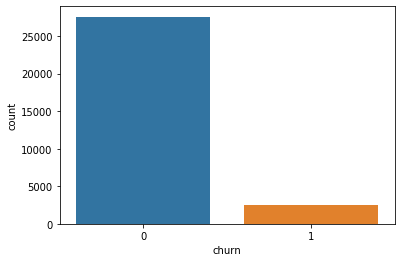

In [31]:
sns.countplot('churn',data=high_val_df)

In [32]:
#Churn rate
100*(high_val_df['churn'].sum()/len(high_val_df.index))

8.136395453484884

In [33]:
#data seems imbalanced

In [34]:
#preview the data
high_val_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,days_last_recharge,churn
0,7000842753,109,0.0,0.0,0.0,9/30/2014,197.385,214.816,213.803,21.100,...,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,23.0,1
7,7000701601,109,0.0,0.0,0.0,9/30/2014,1069.180,1349.850,3171.480,500.000,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,5.0,1
8,7001524846,109,0.0,0.0,0.0,9/30/2014,378.721,492.223,137.362,166.787,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,1.0,0
21,7002124215,109,0.0,0.0,0.0,9/30/2014,514.453,597.753,637.760,578.596,...,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,0.0,0
23,7000887461,109,0.0,0.0,0.0,9/30/2014,74.350,193.897,366.966,811.480,...,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,7.0,0


In [35]:
#preview the shape
high_val_df.shape

(30001, 211)

In [36]:
#copying to another dataframe
high_val=high_val_df.copy()

## removing attributes of the churn phase

In [37]:
#removing columns data related to 9th month
for col in high_val.columns:
    if(col.endswith('_9')):
        high_val.drop(col,axis=1,inplace=True)

In [38]:
#preview the shape
high_val.shape

(30001, 158)

## Data preparation

In [39]:
#check the spread of the data
high_val.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_last_recharge,churn
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,...,30001.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,29418.000000,30001.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.490824,560.782203,508.597957,265.618262,272.700470,...,0.202393,0.926534,0.921733,0.897198,1209.368754,169.138860,178.872765,158.523962,4.312462,0.081364
std,6.908784e+05,0.0,0.0,0.0,0.0,460.640461,479.776947,501.961981,462.493645,482.972367,...,1.100107,0.260908,0.268599,0.303710,957.677989,420.974354,443.544138,416.734860,5.270846,0.273398
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000609e+09,109.0,0.0,0.0,0.0,309.865000,309.826000,231.473000,19.240000,18.155000,...,0.000000,1.000000,1.000000,1.000000,460.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.001203e+09,109.0,0.0,0.0,0.0,481.694000,480.943000,427.585000,88.060000,86.885000,...,0.000000,1.000000,1.000000,1.000000,846.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,7.001804e+09,109.0,0.0,0.0,0.0,699.943000,698.315000,661.491000,297.415000,298.087500,...,0.000000,1.000000,1.000000,1.000000,1756.000000,128.800000,137.290000,98.440000,6.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,30.000000,1.000000


In [40]:
#from above data we can see few columns has no variance (std=0)
col=high_val.describe().loc[:,high_val.describe().loc['std',:]==0.0].columns

In [41]:
#since columns has no variance no inforamtion can be obtain from these columns so dropping them
high_val.drop(col,axis=1,inplace=True)

In [42]:
#previewing the shape of data
high_val.shape

(30001, 148)

In [43]:
#check the percentage of missing values
round(100*(high_val.isna().sum()/len(high_val.index)),2).sort_values(ascending=False)

count_rech_3g_8       46.83
fb_user_8             46.83
night_pck_user_8      46.83
arpu_2g_8             46.83
arpu_3g_8             46.83
                      ...  
last_day_rch_amt_6     0.00
last_day_rch_amt_7     0.00
last_day_rch_amt_8     0.00
vol_2g_mb_6            0.00
mobile_number          0.00
Length: 148, dtype: float64

In [44]:
#drop the columns having more than 60% missing values
high_val=high_val.loc[:,round(100*(high_val.isna().sum(axis=0)/len(high_val.index)),2)<60]

In [45]:
#preview shape of the data
high_val.shape

(30001, 148)

In [46]:
#filling the remaining missing values with 0 as no data indicates there is no call or no recharge ...etc 
high_val.fillna(0,inplace=True)

In [47]:
#check for missing values
high_val.isna().sum()

mobile_number         0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
                     ..
vbc_3g_8              0
vbc_3g_7              0
vbc_3g_6              0
days_last_recharge    0
churn                 0
Length: 148, dtype: int64

#### Univariant analysis

In [48]:
#function to show bar plot of 6 and 7 and 8 based on churn column
def bar_plot(col):
    #Create Bar Plot as it plots the average of the feature of corresponding month
    fig,ax=plt.subplots(1,3,figsize=(14, 4))
    sns.barplot(x = 'churn', y = col+'_6', data = high_val,ax=ax[0],)
    sns.barplot(x = 'churn', y = col+'_7', data = high_val,ax=ax[1])
    sns.barplot(x = 'churn', y = col+'_8', data = high_val,ax=ax[2])
    plt.show()


In [49]:
#dataframe having data of non churned customers
non_churned_df=high_val[high_val['churn']==0]

In [50]:
#dataframe having data of churned customers
churned_df=high_val[high_val['churn']==1]

In [51]:
#line plot to check the trend of columns by churned and non churned customers
def line_plot(col):
    plt.title("line plot bar plot and box plots for "+col+" column for months 6,7 and 8\n",fontdict={'fontsize':20})
    sns.lineplot(y=[non_churned_df[col+'_6'].mean(),non_churned_df[col+'_7'].mean(),non_churned_df[col+'_8'].mean()],x=['June','July','Aug'],label='non_churned',sort=False)
    sns.lineplot(y=[churned_df[col+'_6'].mean(),churned_df[col+'_7'].mean(),churned_df[col+'_8'].mean()],x=['June','July','Aug'],label='churned',sort=False)
    plt.show()

In [52]:
#function to show box plot for 6,7,8 months for a 
def box_plot(col):
    fig,ax=plt.subplots(1,3,figsize=(14, 4))
    sns.boxplot(x='churn',y=col+'_6',hue='churn',palette='plasma',data=high_val,ax=ax[0])
    sns.boxplot(x='churn',y=col+'_7',hue='churn',palette='plasma',data=high_val,ax=ax[1])
    sns.boxplot(x='churn',y=col+'_8',hue='churn',palette='plasma',data=high_val,ax=ax[2])
    plt.show()

In [53]:
#creating columns list having data of 3 month to draw above plots
colu=high_val.columns[3:]
colu=colu.str.replace('_6','')
colu=colu.str.replace('_7','')
colu=colu.str.replace('_8','')
colu=list(set(colu))
colu.remove('churn')
colu.remove('aon')
colu.remove('days_last_recharge')

In [54]:
colu

['vol_3g_mb',
 'std_ic_mou',
 'roam_ic_mou',
 'total_ic_mou',
 'night_pck_user',
 'fb_user',
 'roam_og_mou',
 'onnet_mou',
 'spl_og_mou',
 'std_og_t2m_mou',
 'max_rech_data',
 'arpu_2g',
 'loc_og_t2f_mou',
 'loc_ic_mou',
 'isd_og_mou',
 'std_og_t2f_mou',
 'loc_ic_t2m_mou',
 'ic_others',
 'loc_og_t2m_mou',
 'monthly_2g',
 'total_rech_num',
 'spl_ic_mou',
 'sachet_2g',
 'og_others',
 'count_rech_2g',
 'vol_2g_mb',
 'last_day_rch_amt',
 'total_rech_amt',
 'isd_ic_mou',
 'arpu_3g',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'total_og_mou',
 'std_og_mou',
 'count_rech_3g',
 'monthly_3g',
 'vbc_3g',
 'loc_og_t2t_mou',
 'loc_ic_t2t_mou',
 'max_rech_amt',
 'offnet_mou',
 'loc_og_mou',
 'arpu',
 'std_og_t2t_mou',
 'sachet_3g',
 'loc_og_t2c_mou',
 'std_ic_t2f_mou',
 'loc_ic_t2f_mou']

In [55]:
#box plot to check to spread of columns by churned and non churned customers

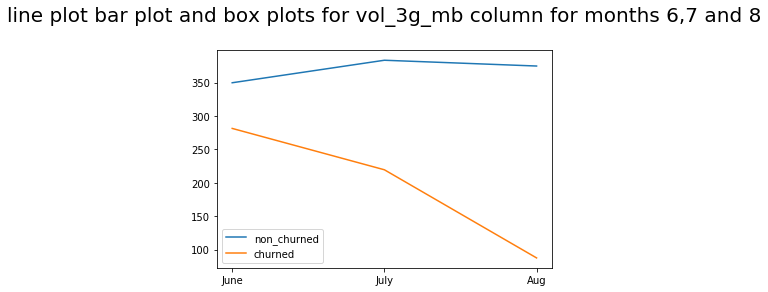

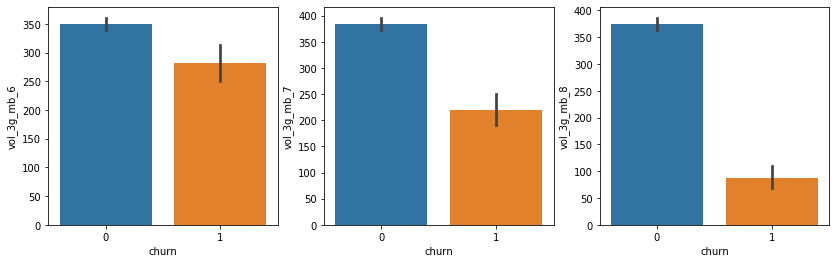

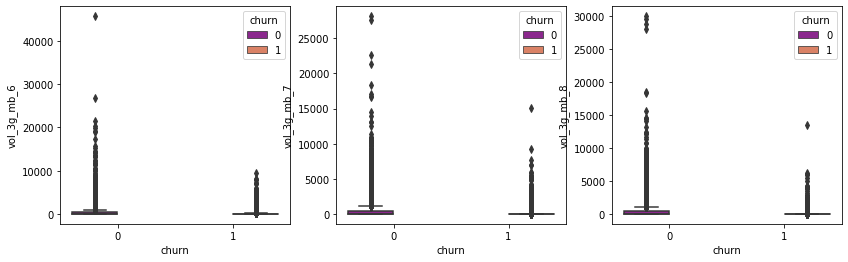

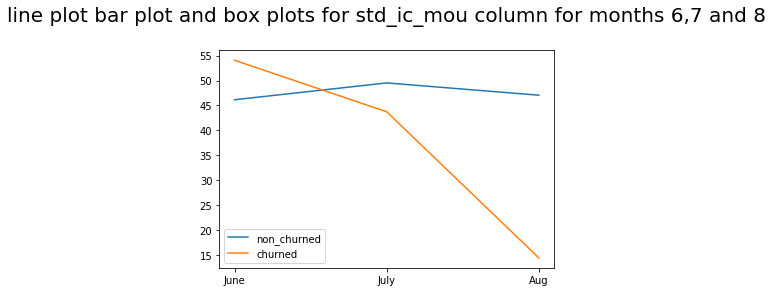

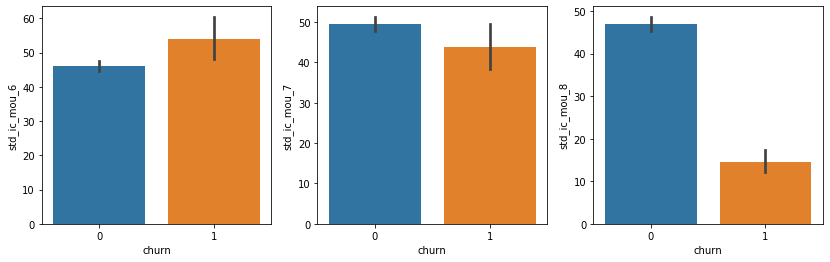

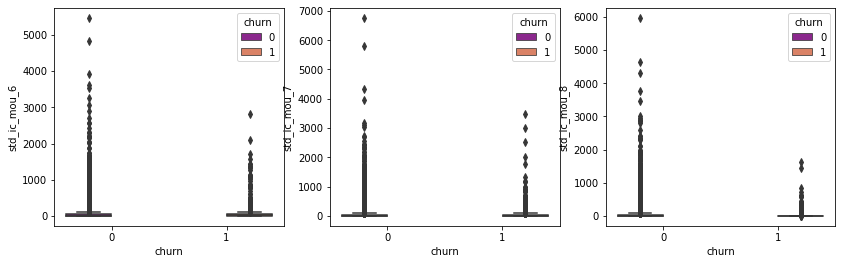

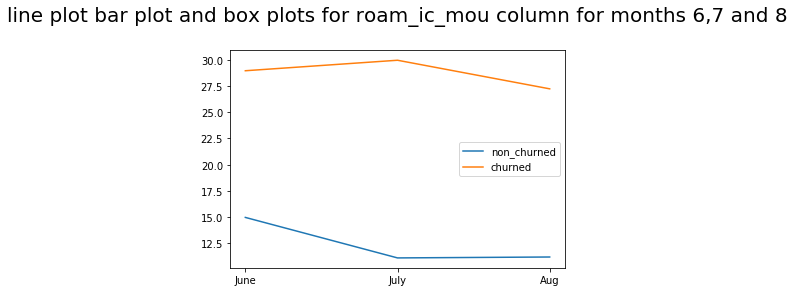

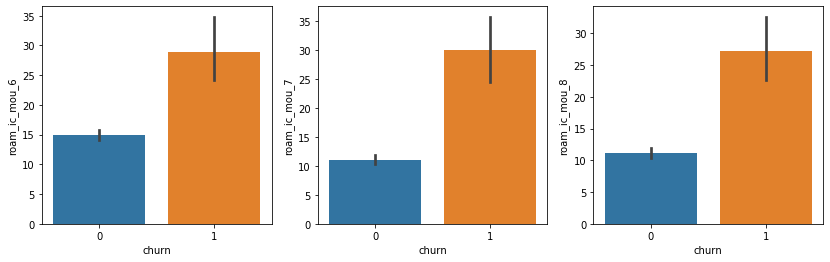

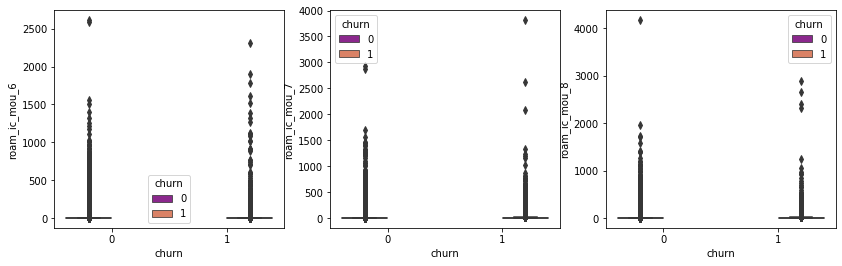

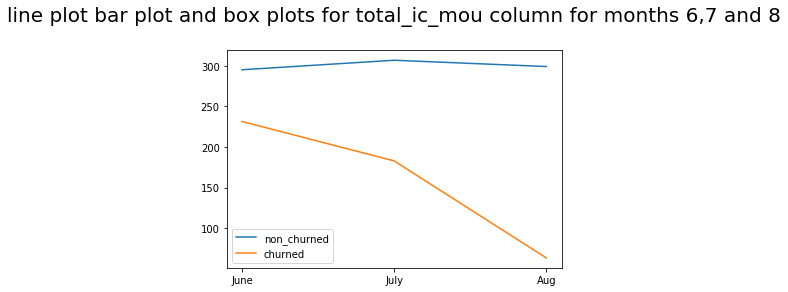

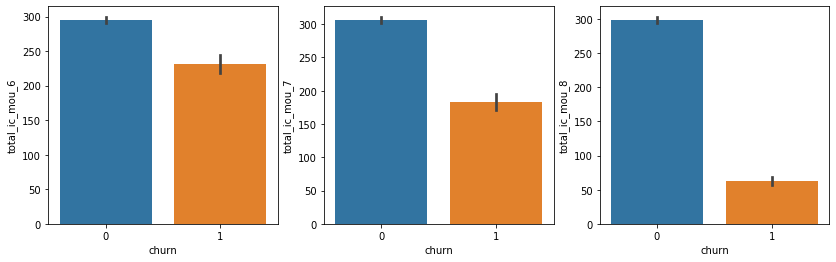

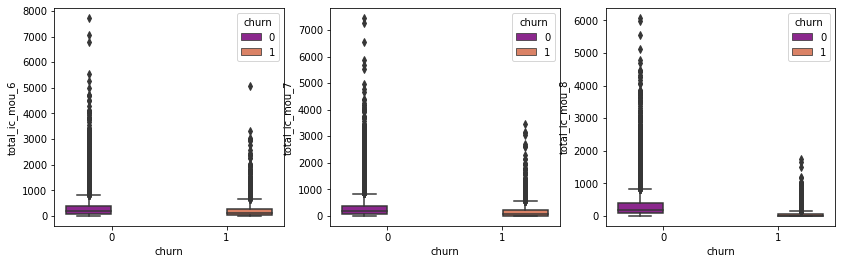

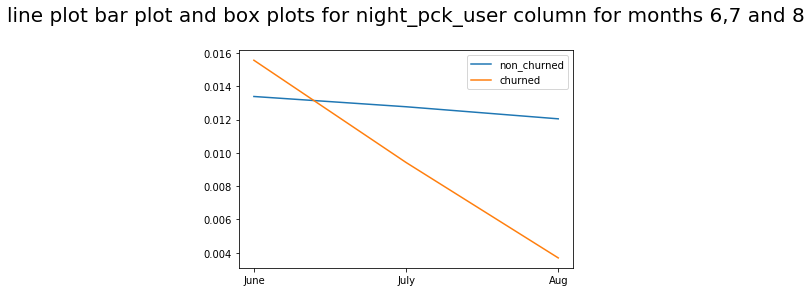

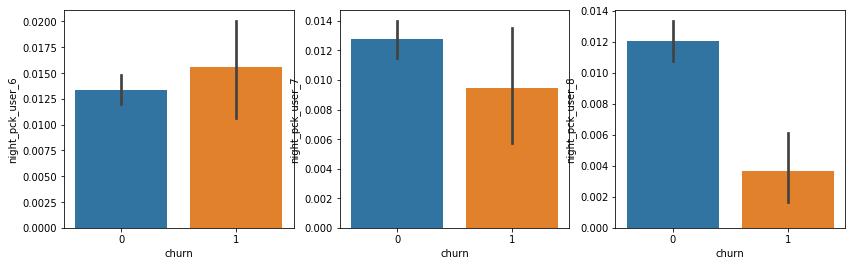

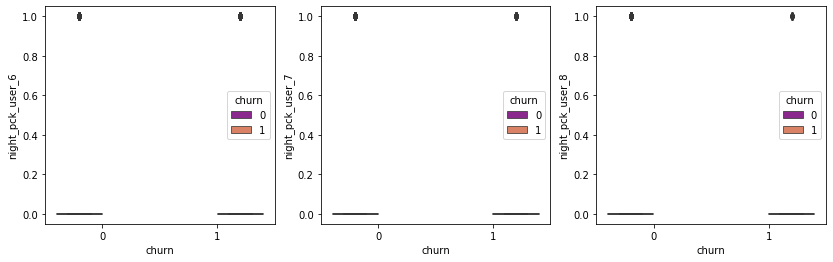

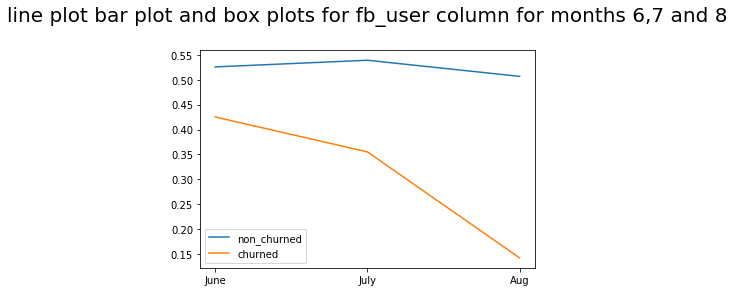

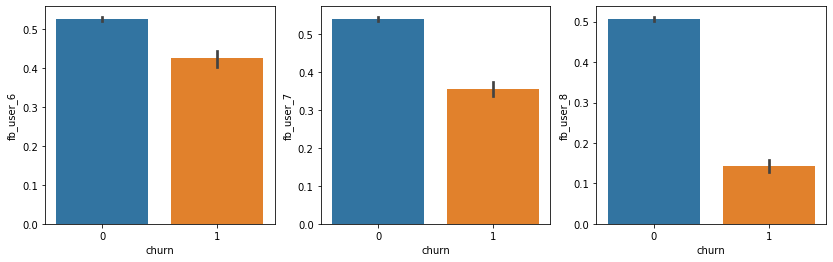

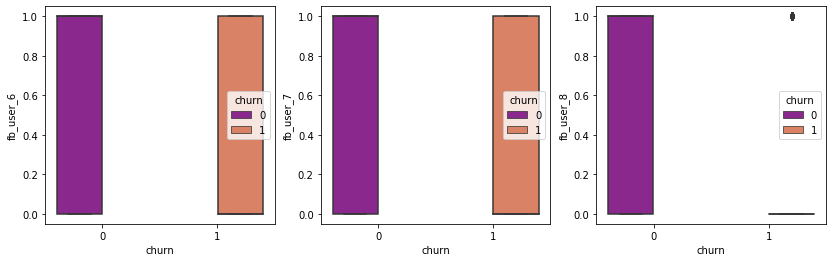

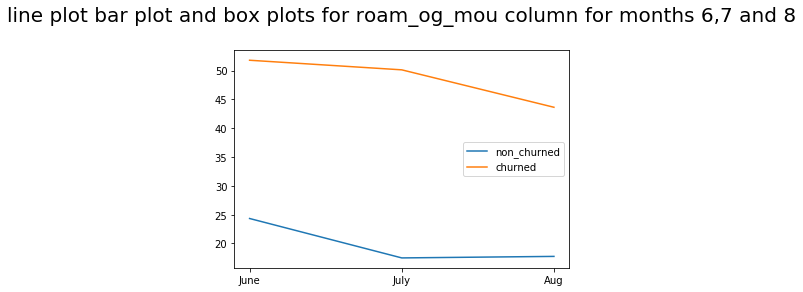

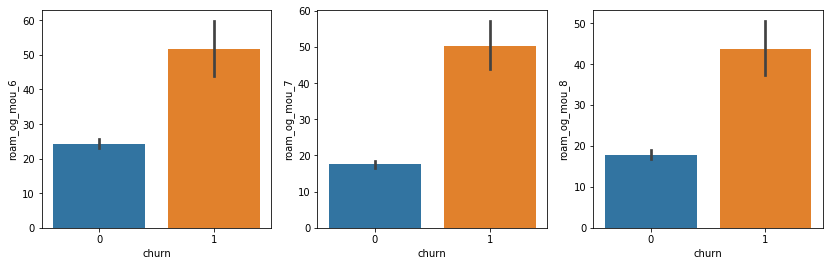

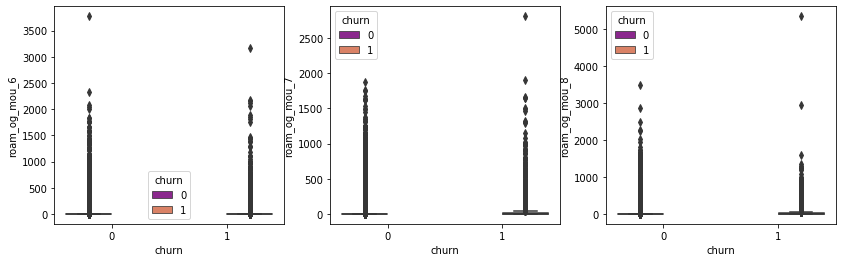

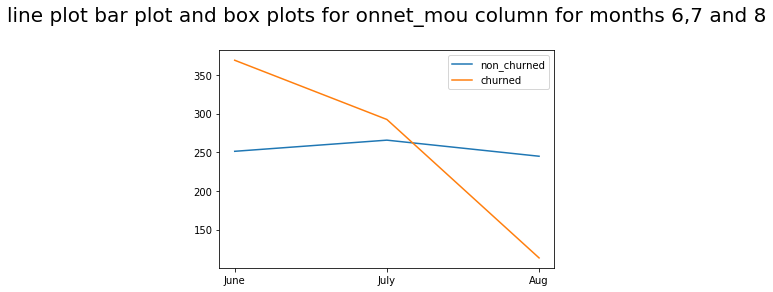

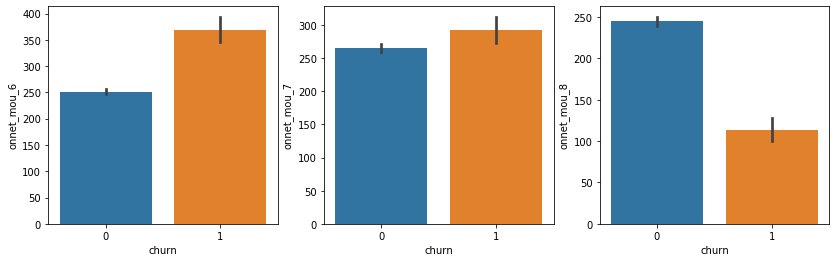

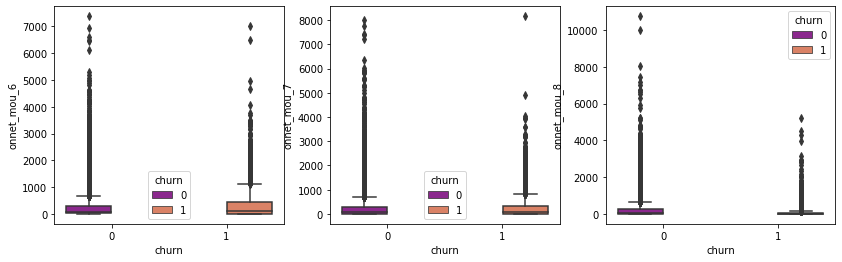

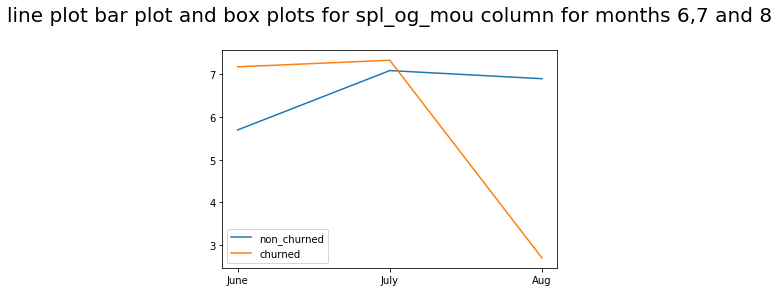

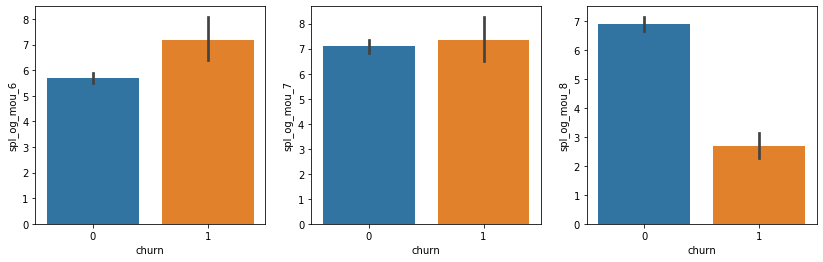

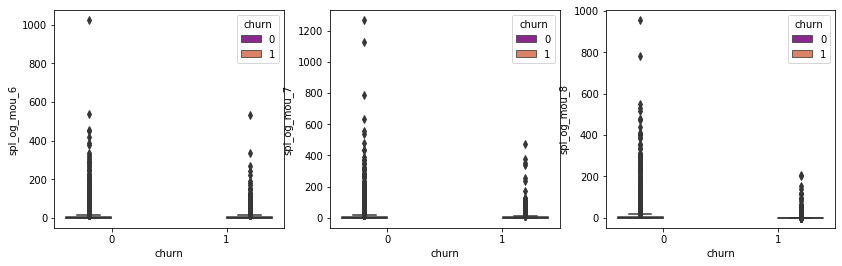

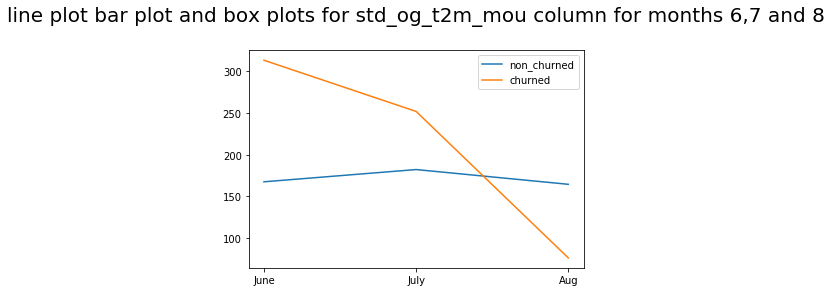

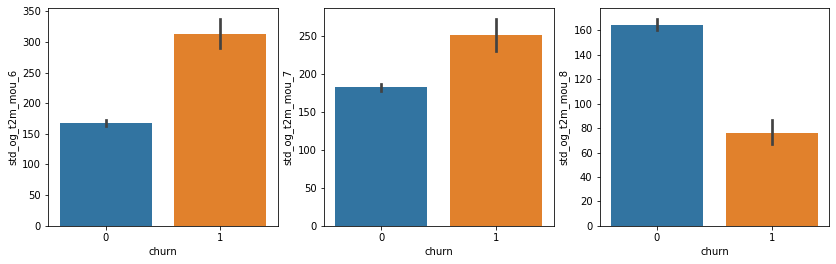

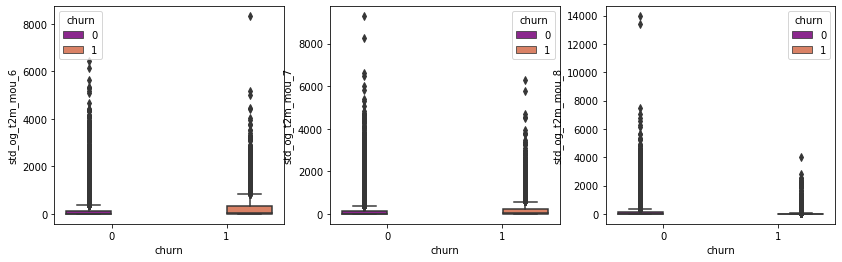

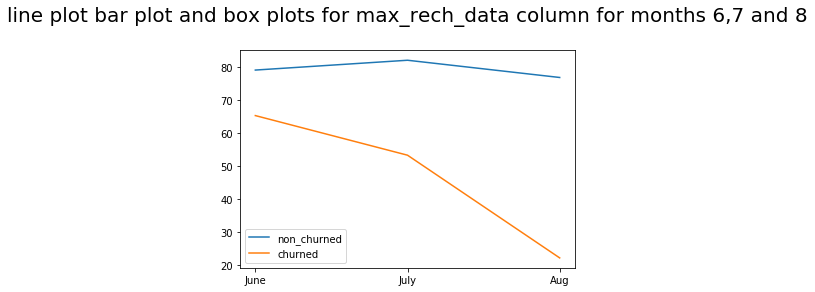

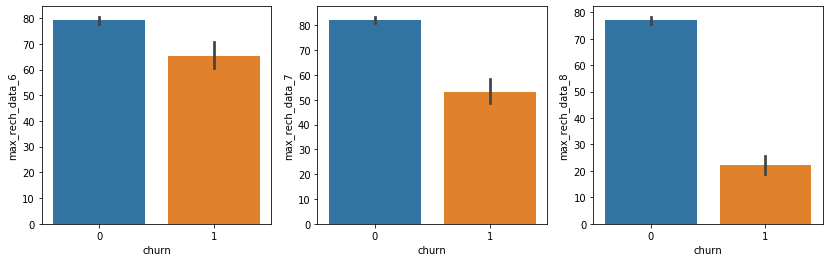

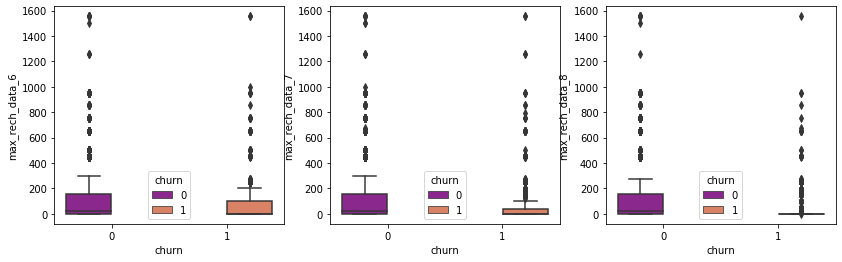

In [56]:
for col in colu[:11]:
    line_plot(col)
    bar_plot(col)
    box_plot(col)

In [57]:
# ## Insights from above plots
# std_ic_t2m,max_rech_amt,sachet_3g,monthly_3g,std_og_t2m,loc_ic_t2f_mou,isd_ic_mou,
#std_ic_t2f_mou,total_og_mou,roam_ic_mou,std_ic_t2t_mou usage are following a large drop from 7th month to 8th month for 
#customer who churned

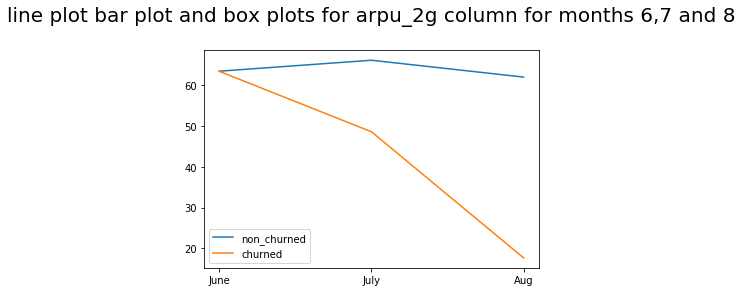

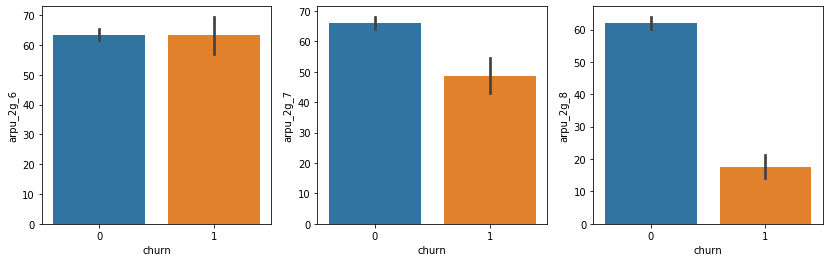

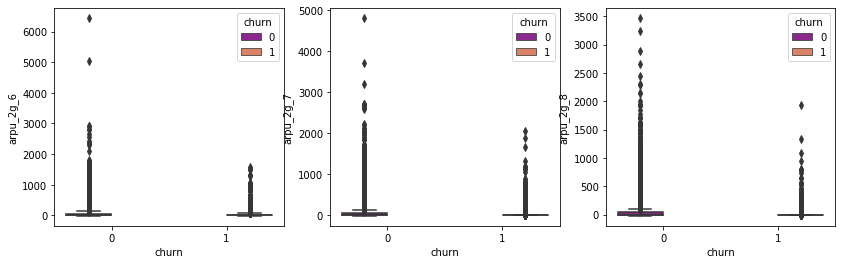

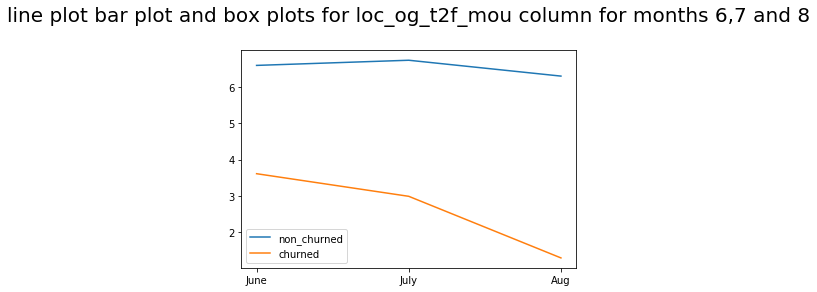

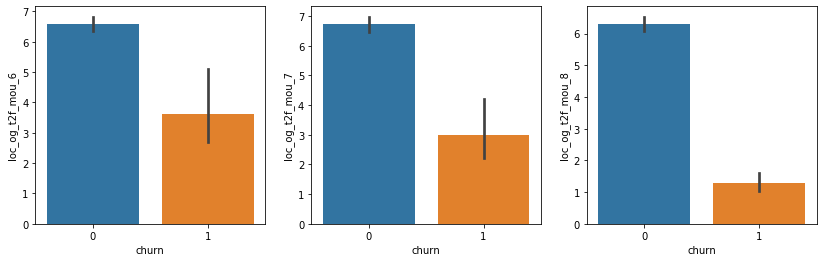

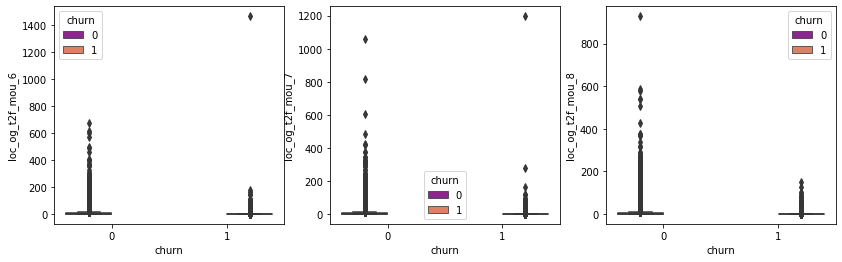

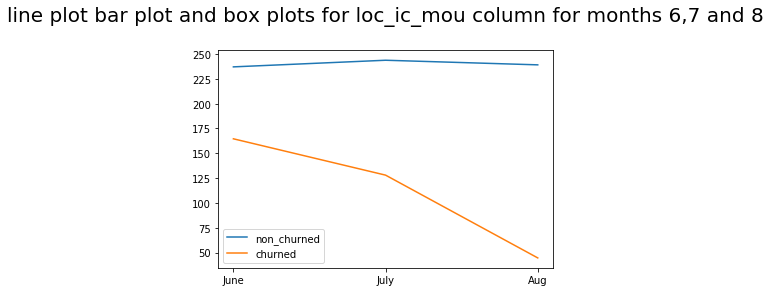

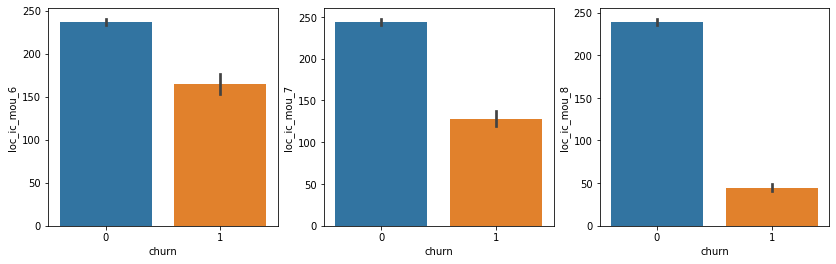

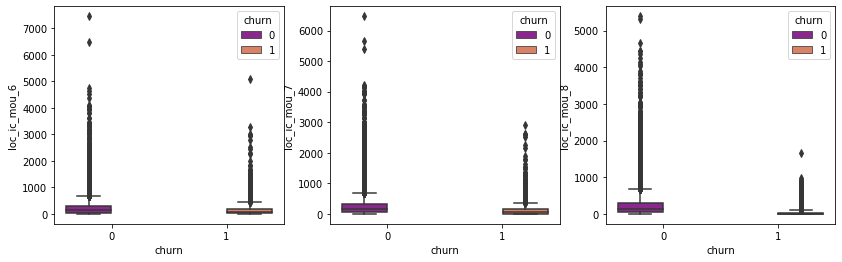

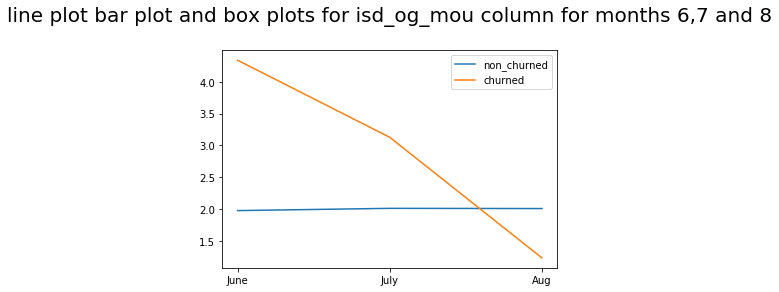

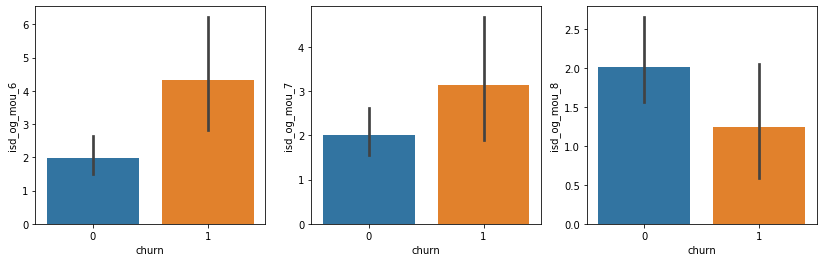

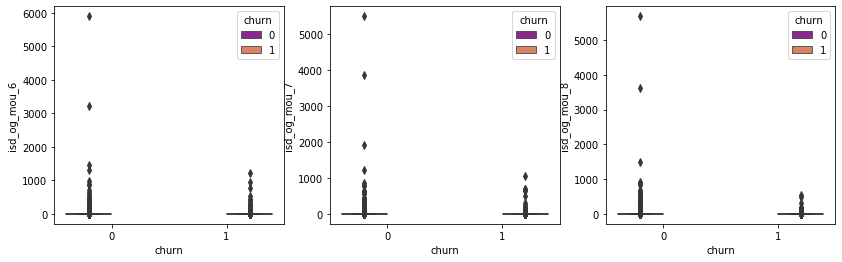

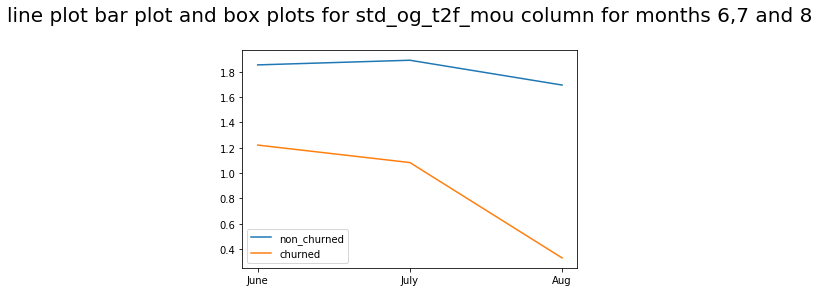

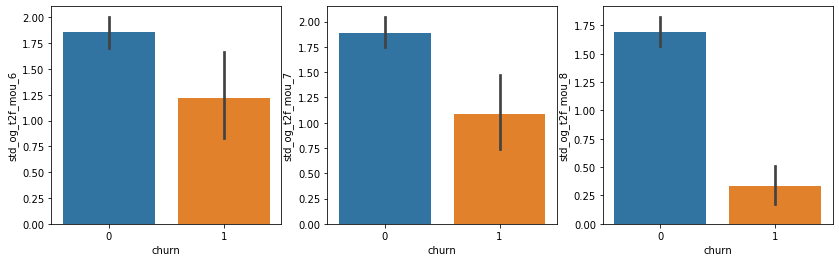

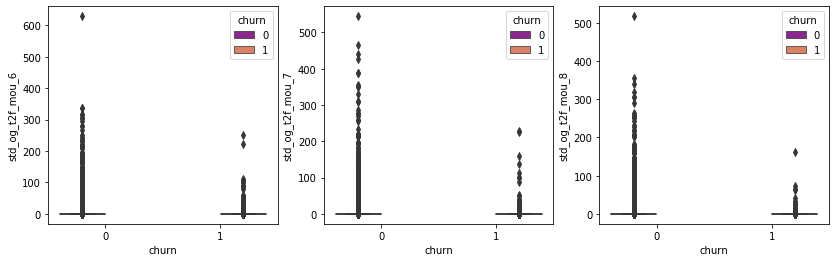

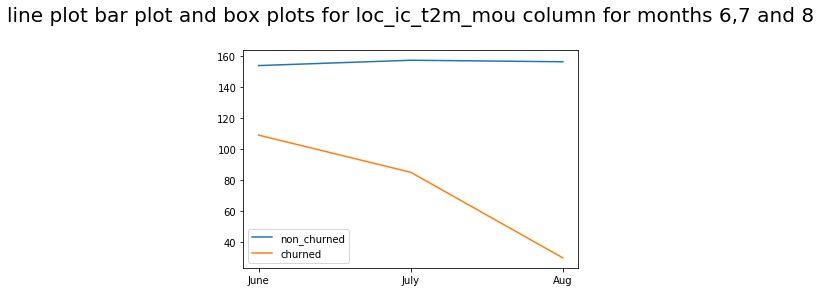

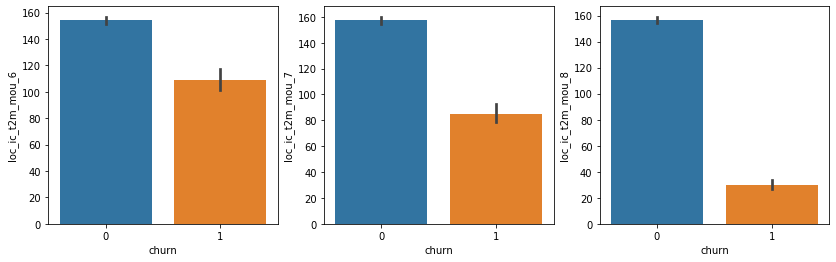

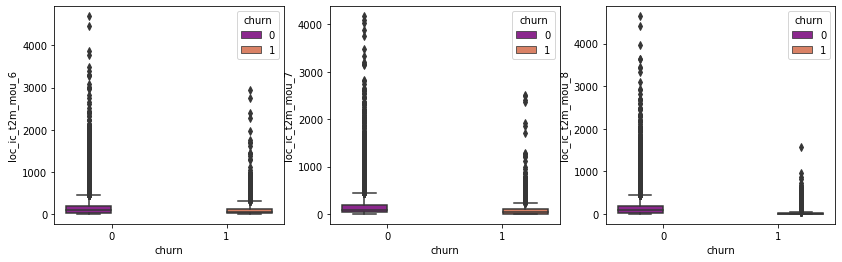

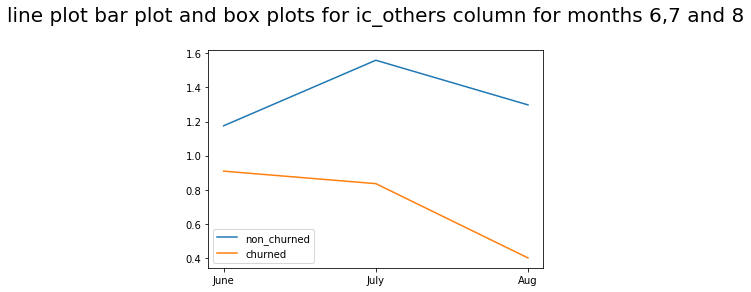

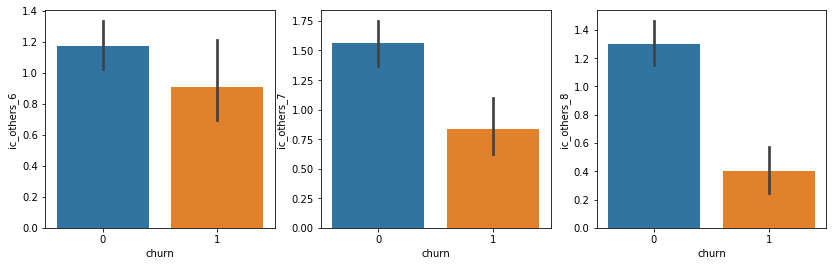

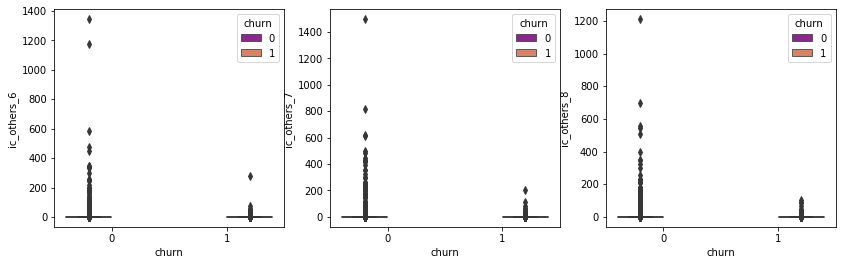

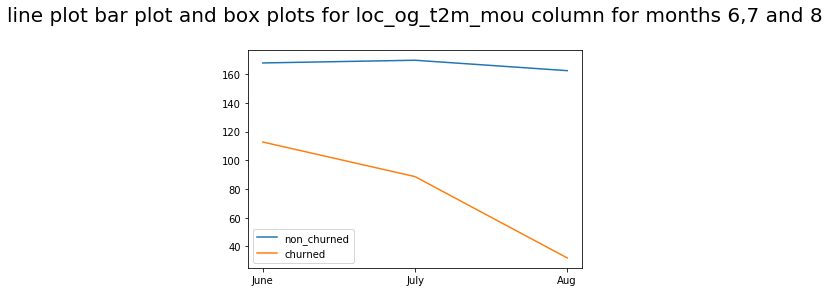

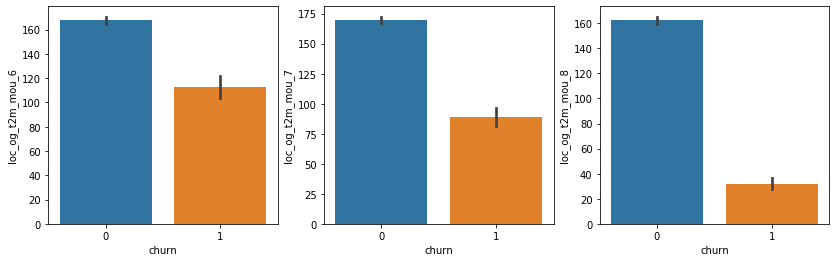

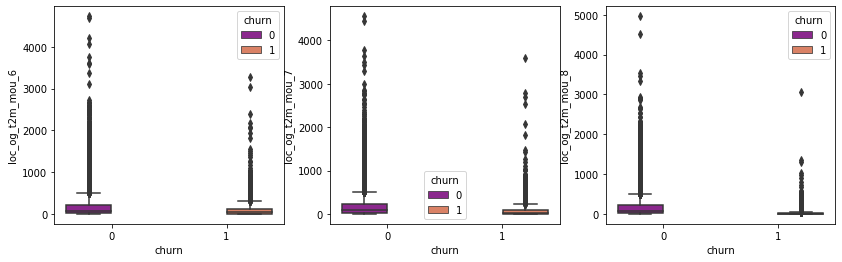

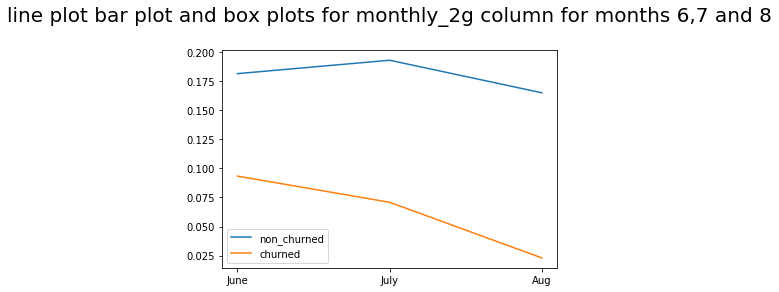

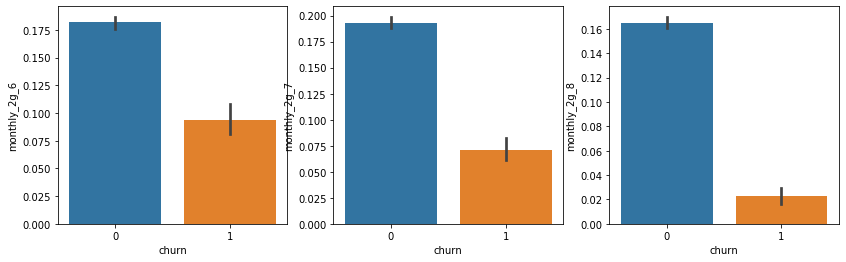

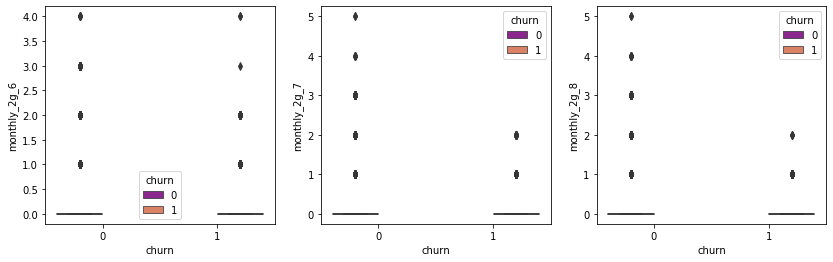

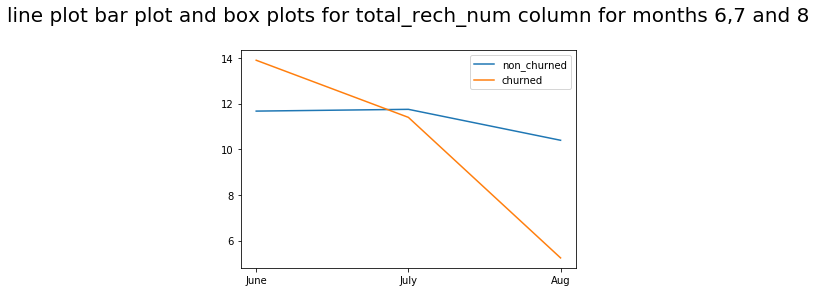

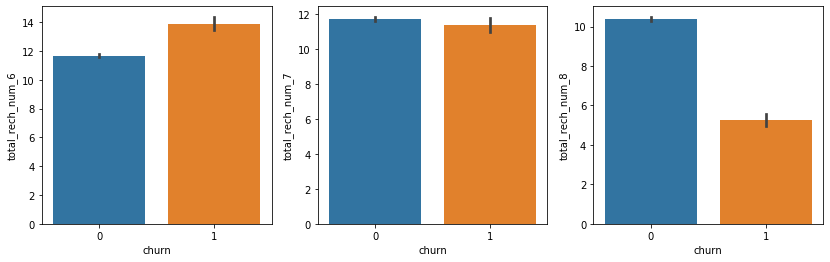

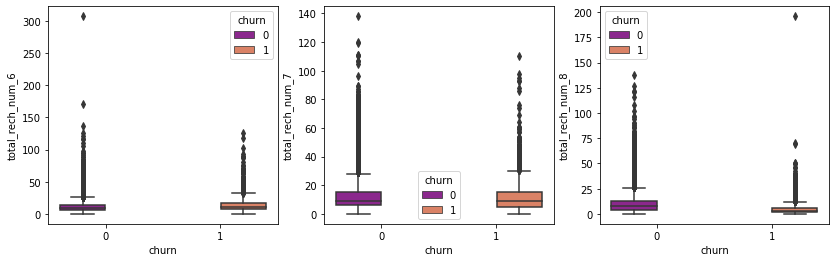

In [58]:
for col in colu[11:21]:
    line_plot(col)
    bar_plot(col)
    box_plot(col)

In [59]:
#roam_og_mou 
#loc_ic_t2t_mou,total_rech_amt,vbc_3g,arpu,monthly_2g,loc_og_t2c_mou,loc_ic_t2m_mou,loc_ic_mou,std_ic_mou
#usage are following a large drop from 7th month to 8th month for customer who churned


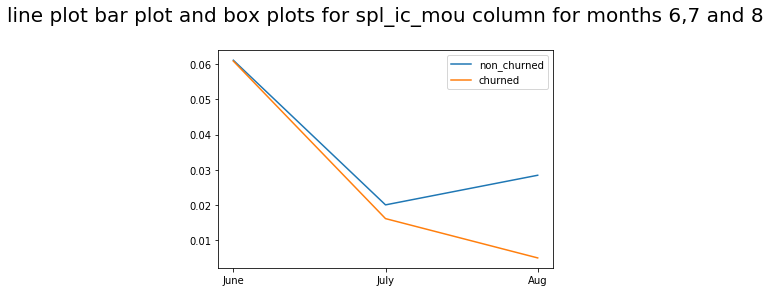

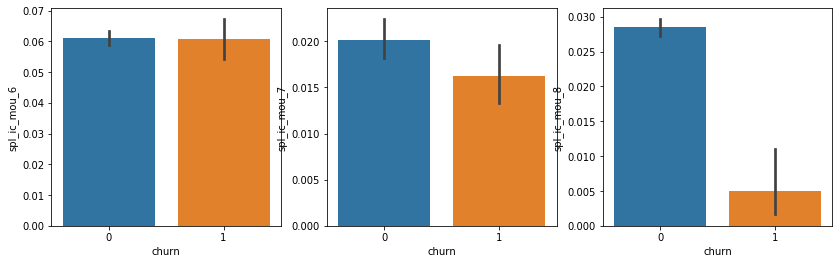

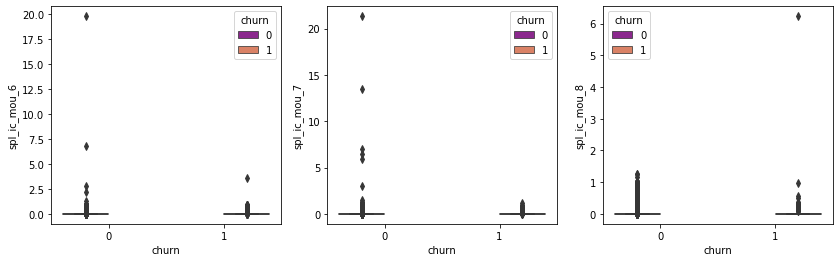

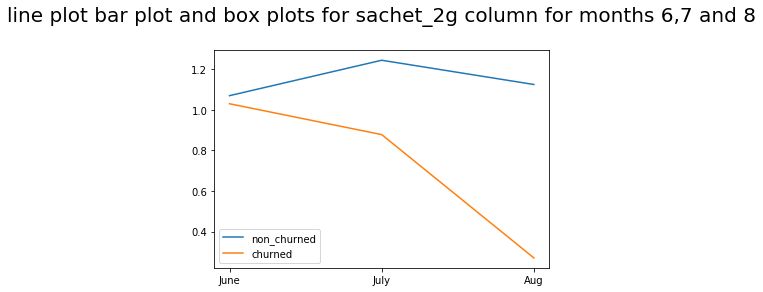

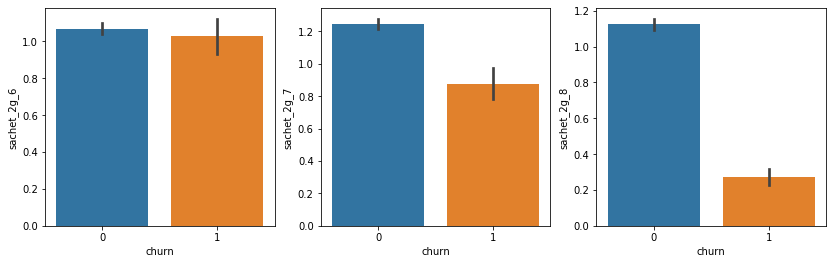

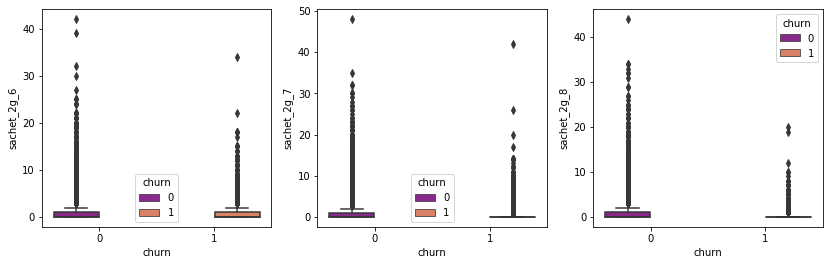

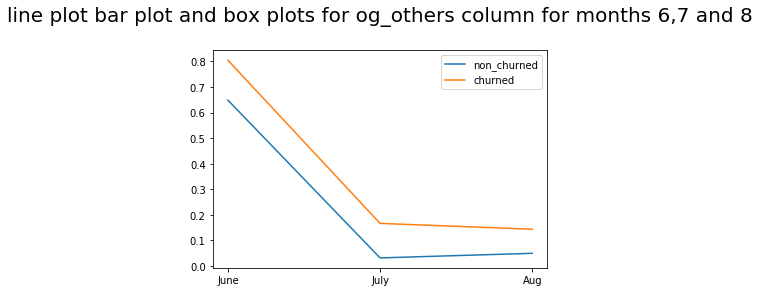

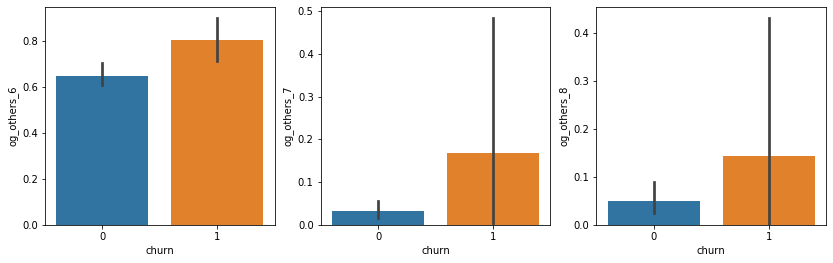

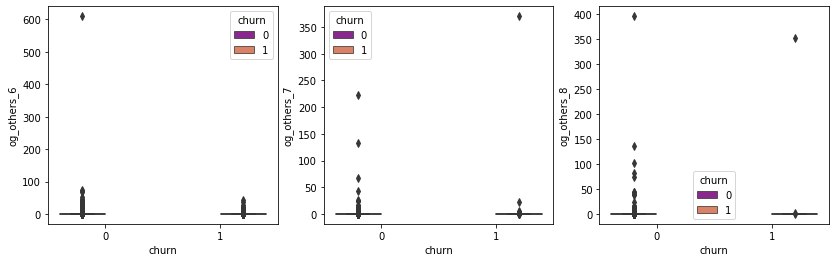

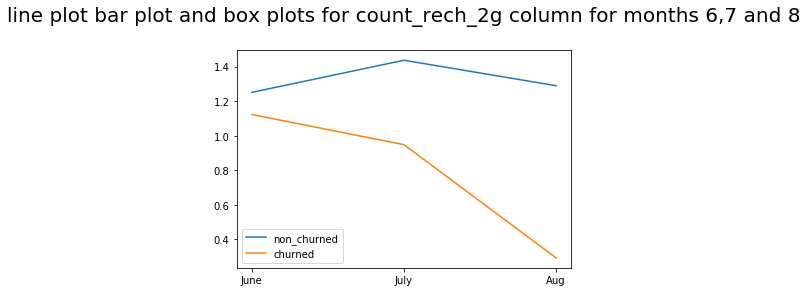

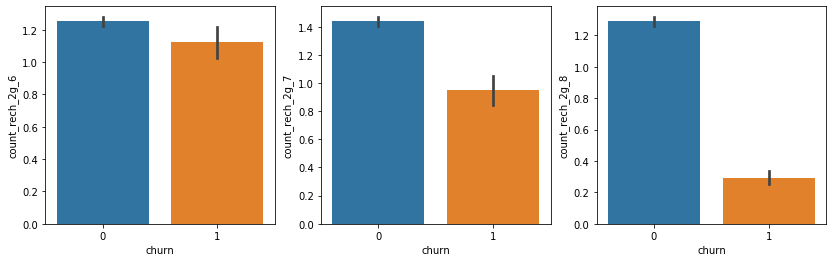

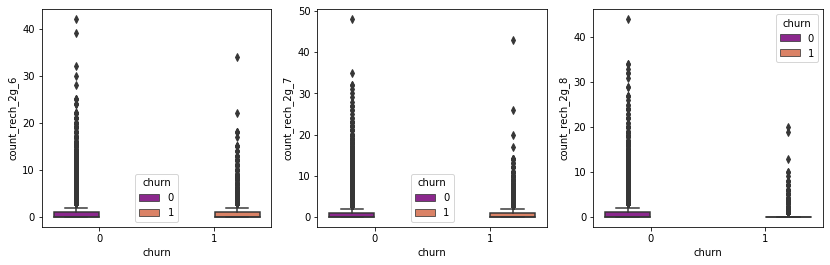

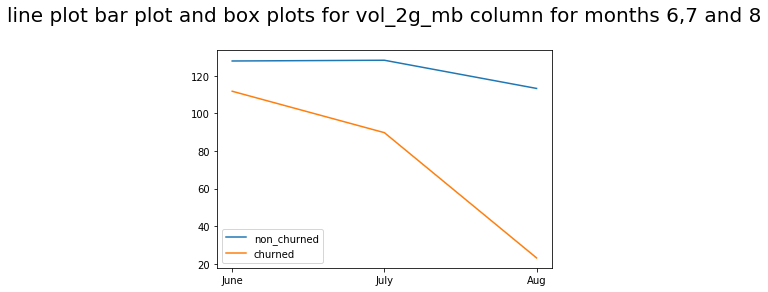

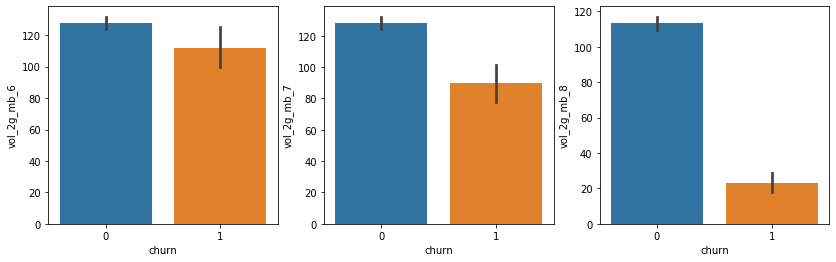

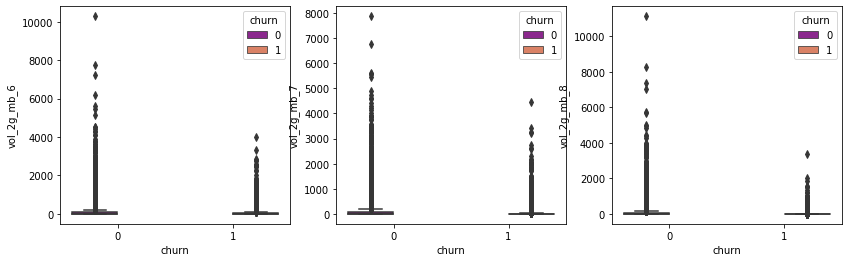

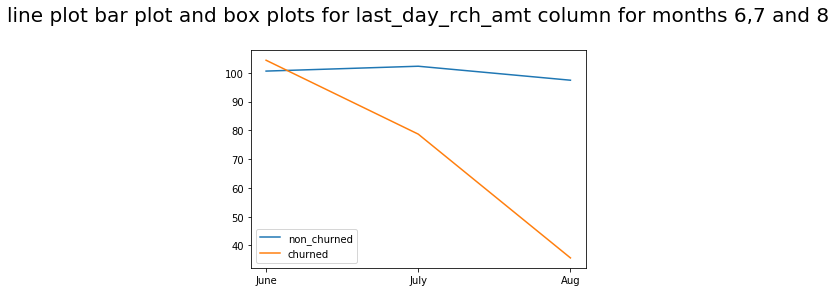

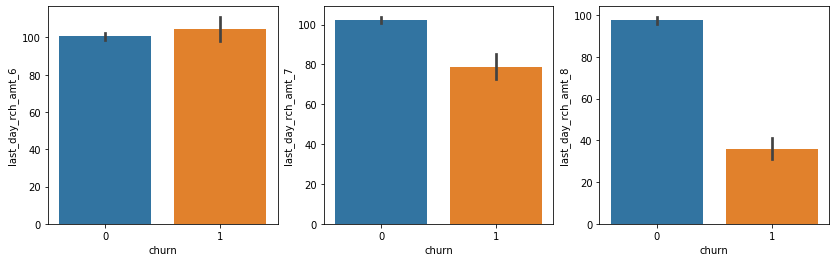

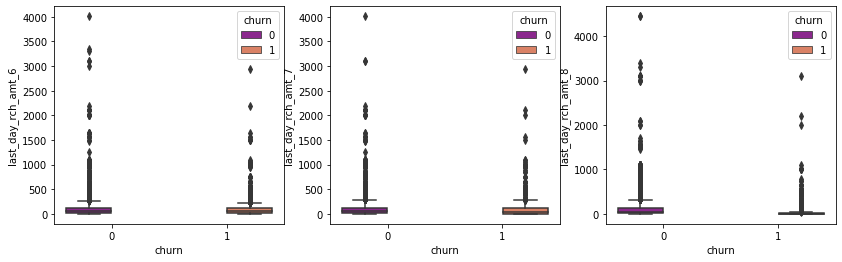

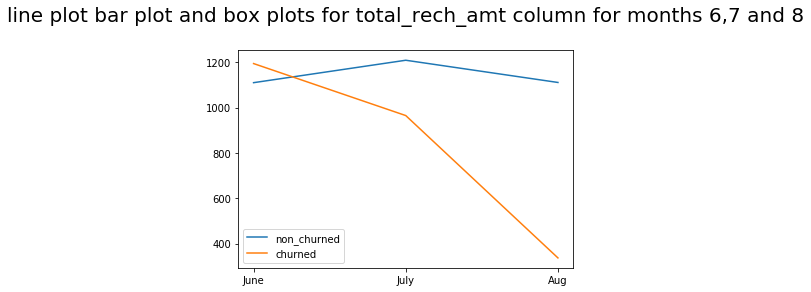

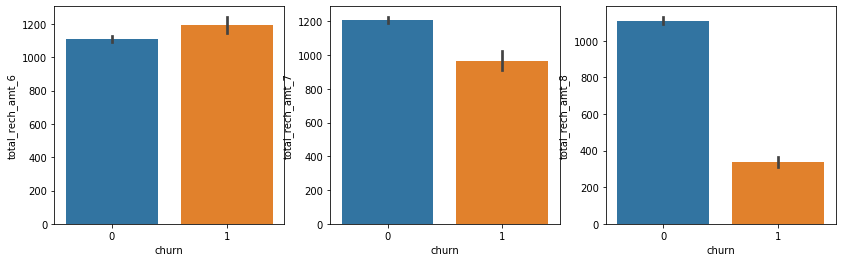

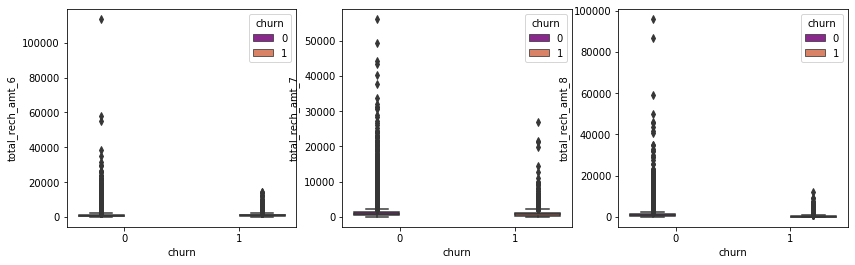

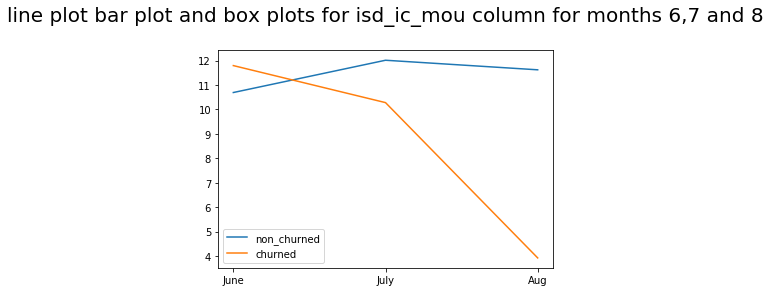

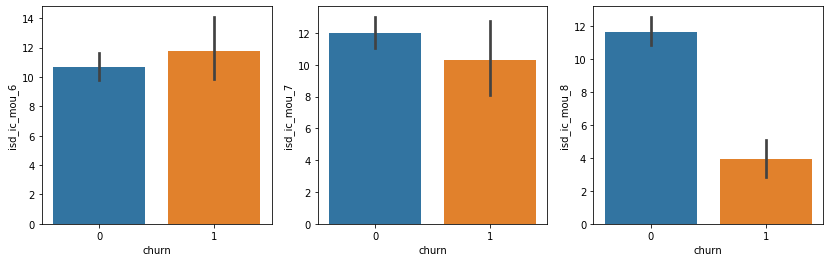

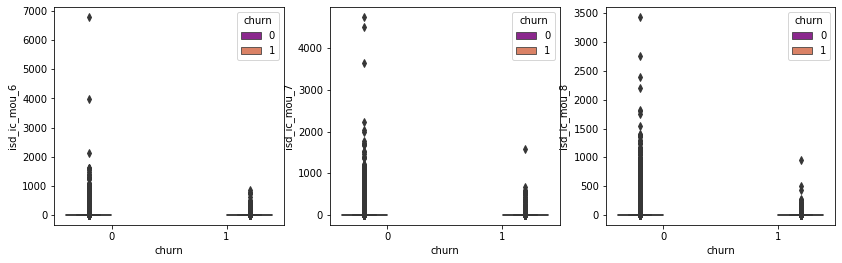

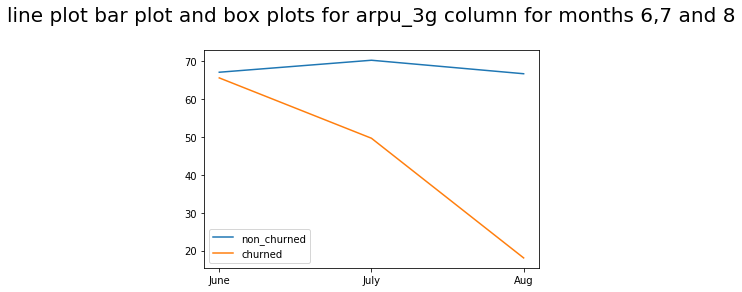

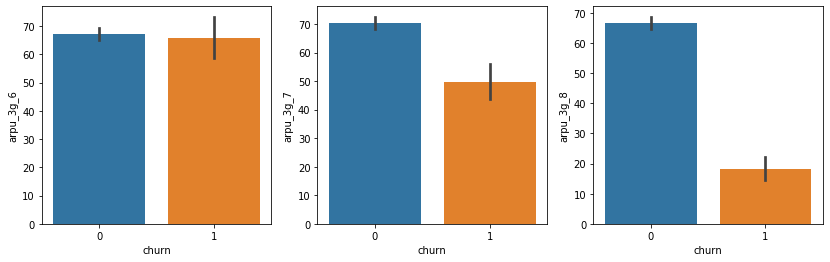

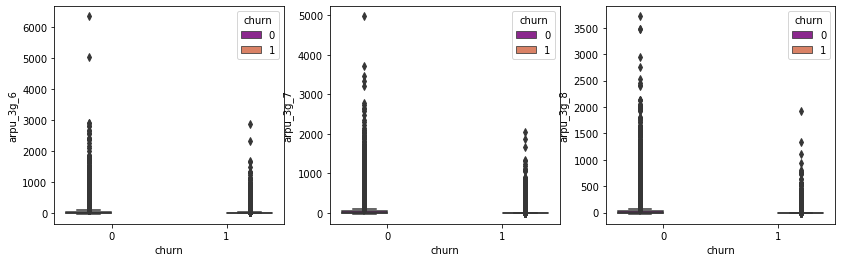

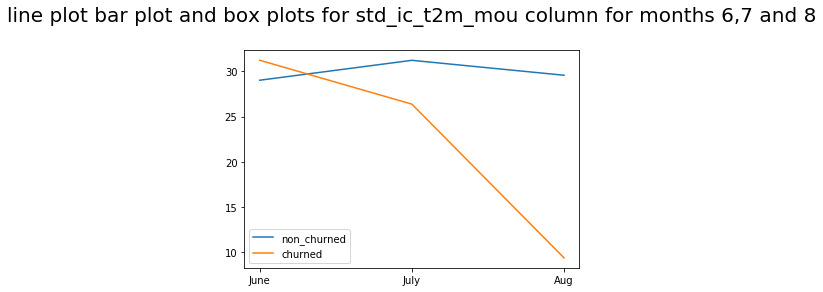

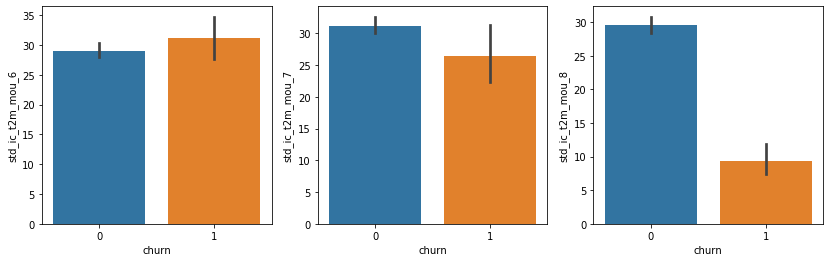

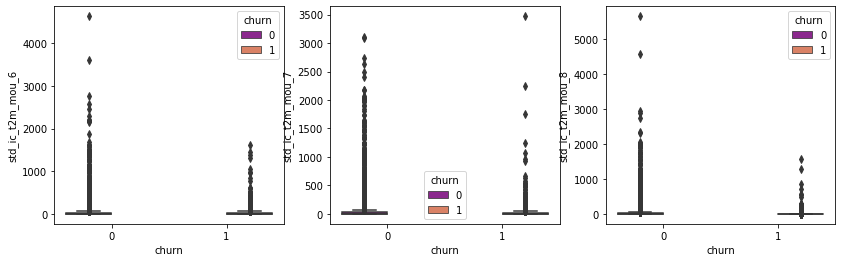

In [60]:
for col in colu[21:31]:
    line_plot(col)
    bar_plot(col)
    box_plot(col)

In [61]:
#ic_others,offnet_mou,loc_og_t2f_mou,total_ic_mou,std_og_mou,spl_ic_mou,std_og_t2t_mou,spl_og_mou,
#last_day_rch_amt,isd_og_mou is following a drop from 7th month to 8th month for customer who churned

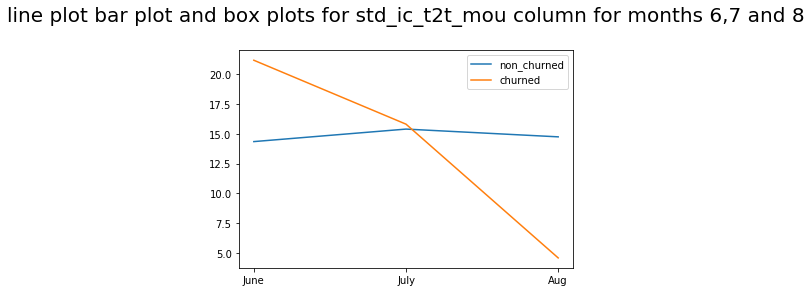

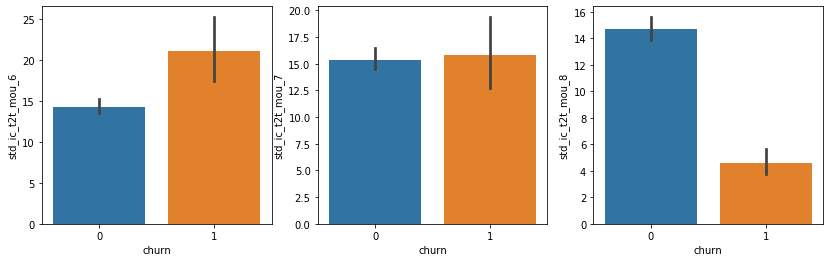

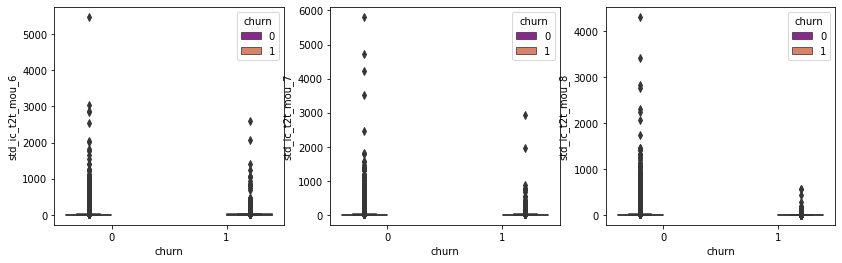

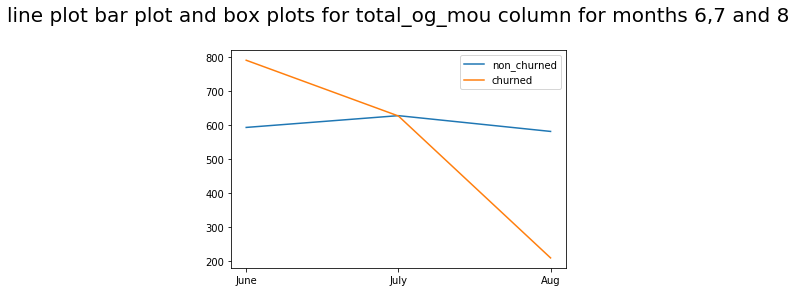

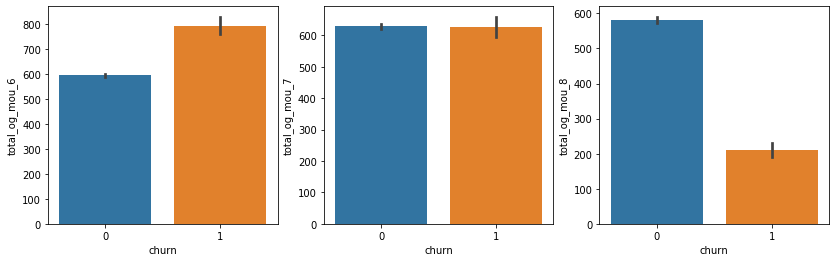

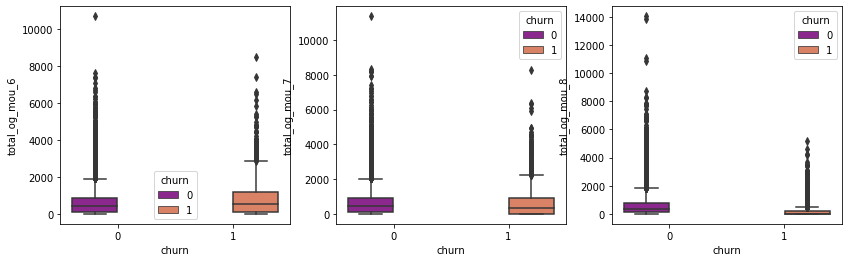

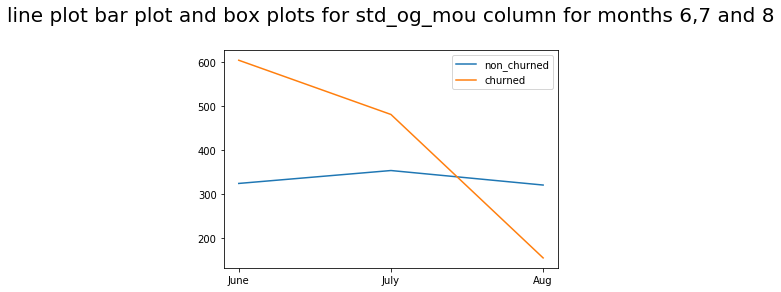

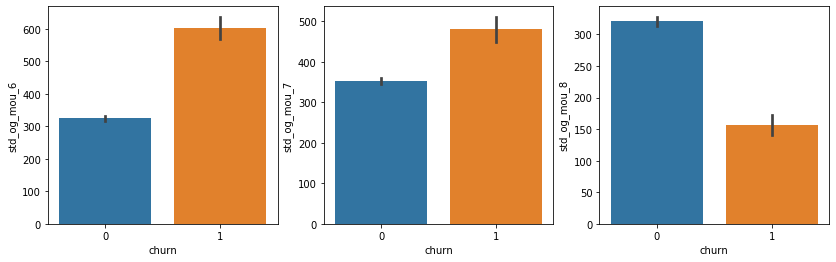

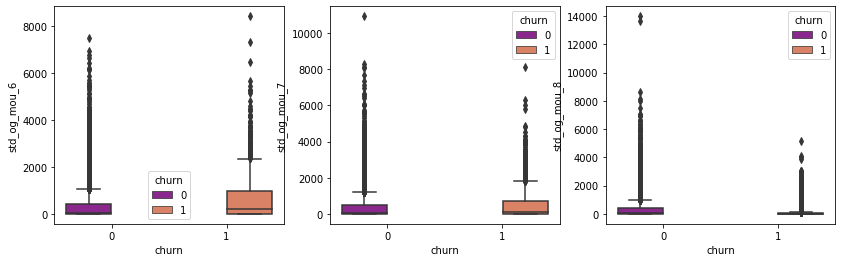

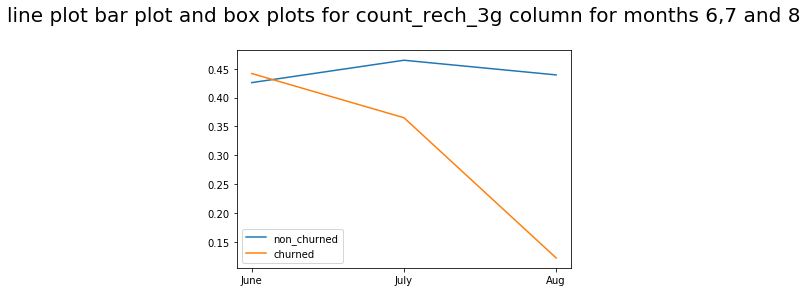

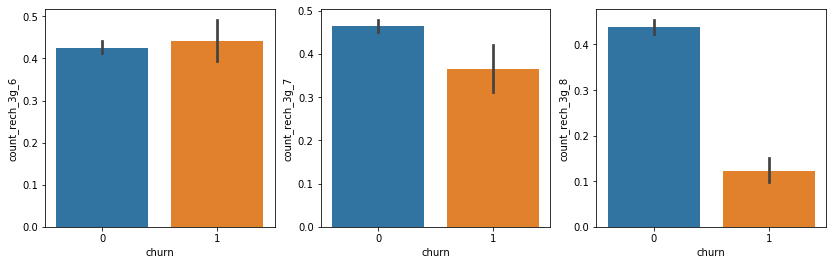

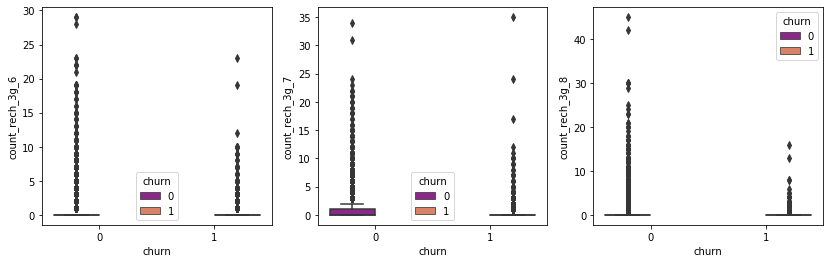

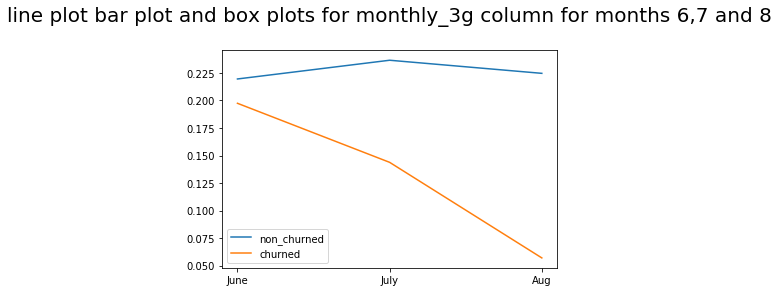

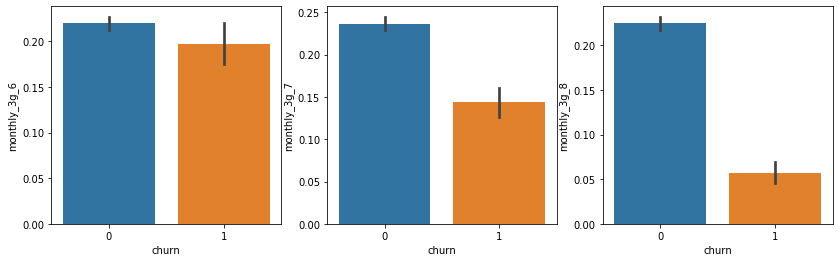

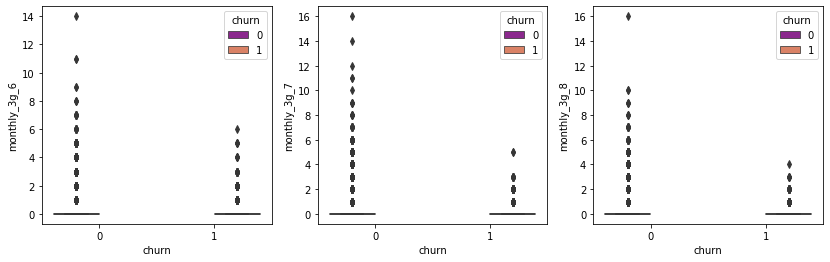

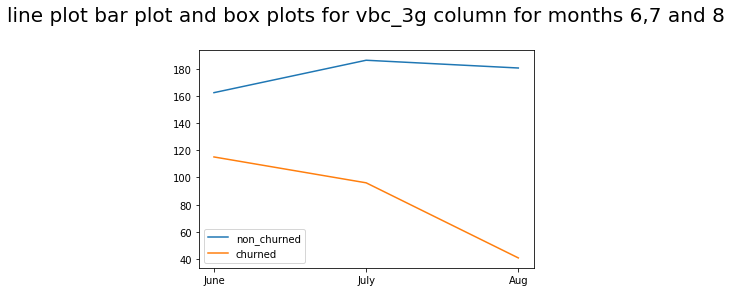

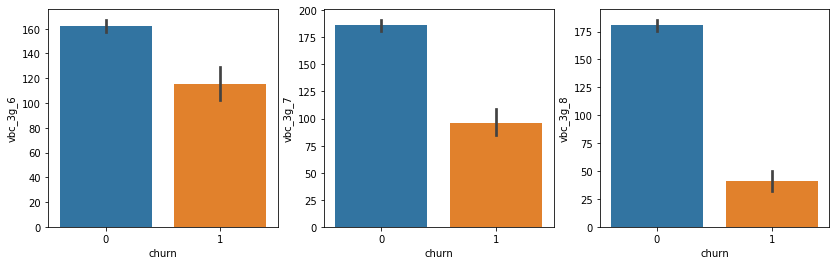

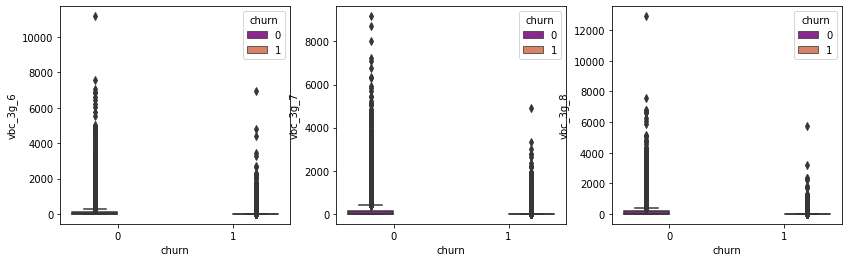

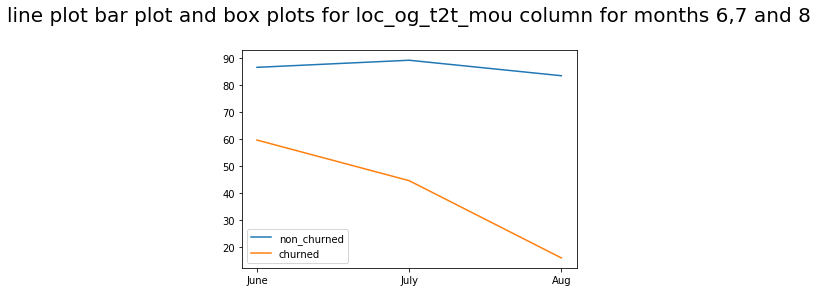

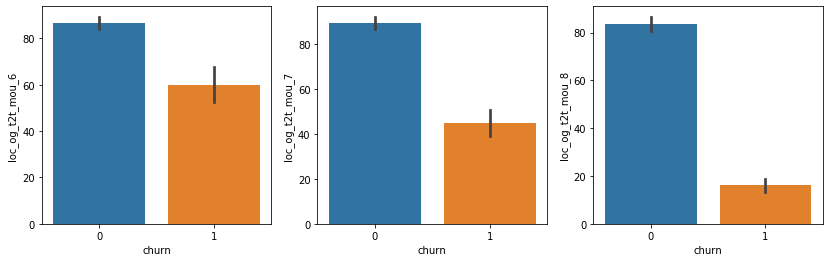

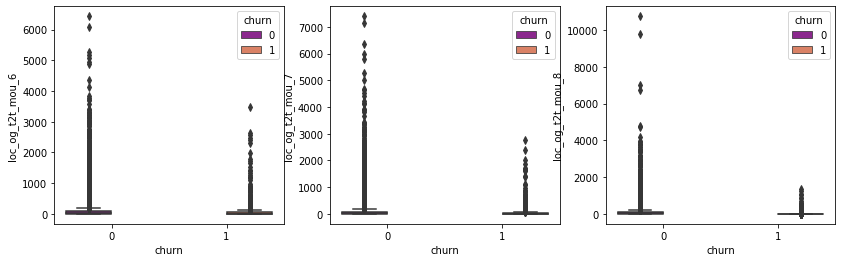

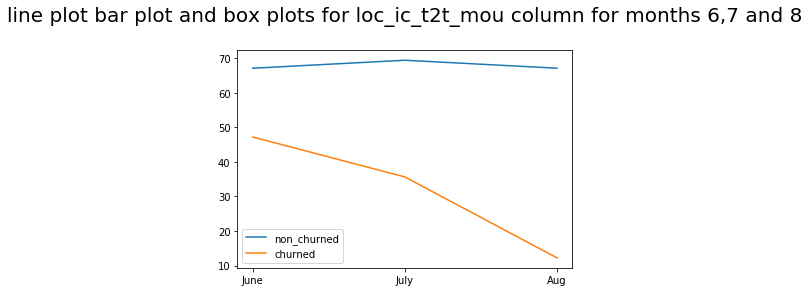

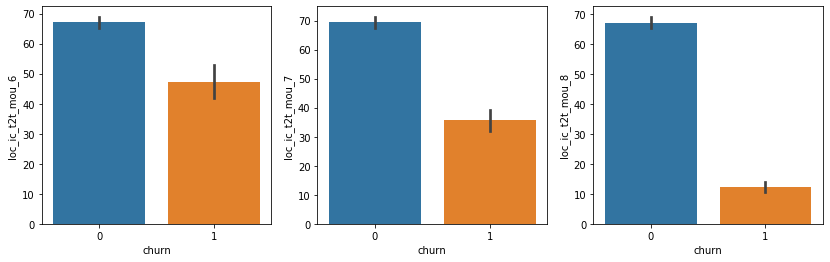

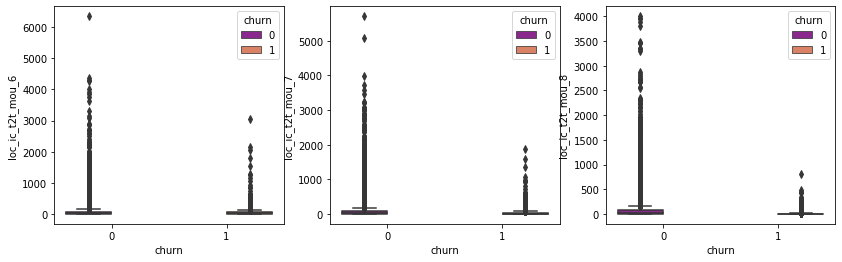

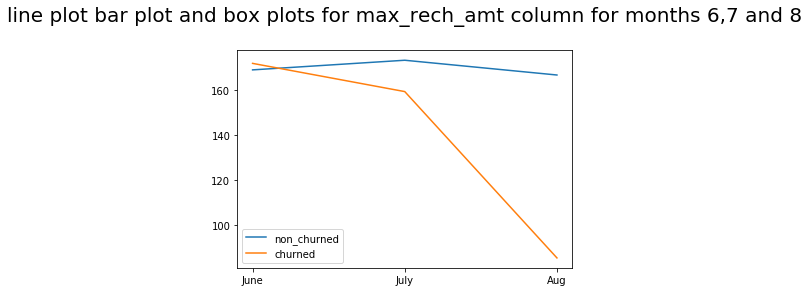

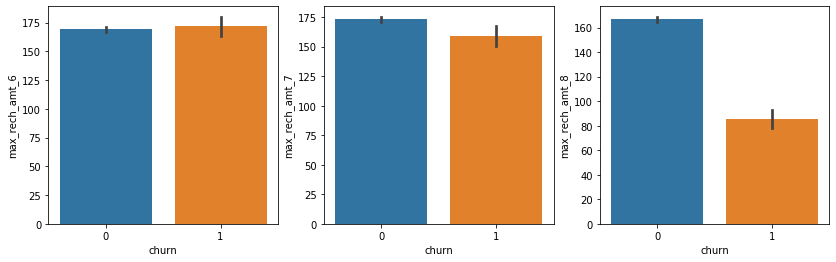

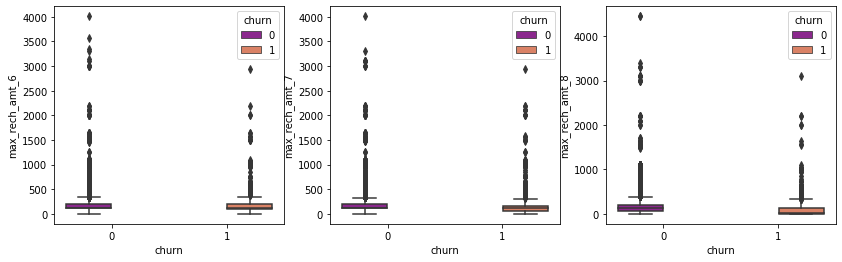

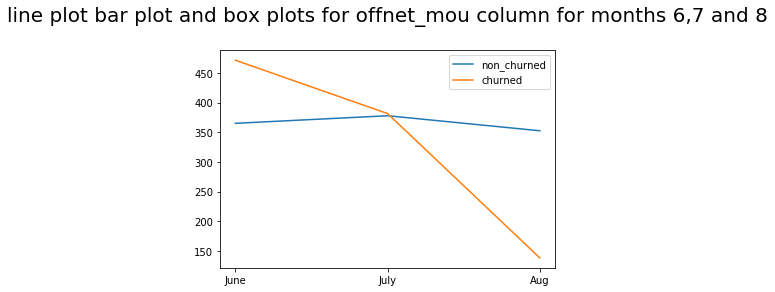

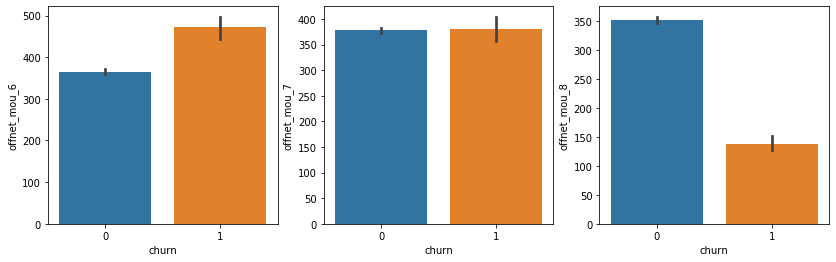

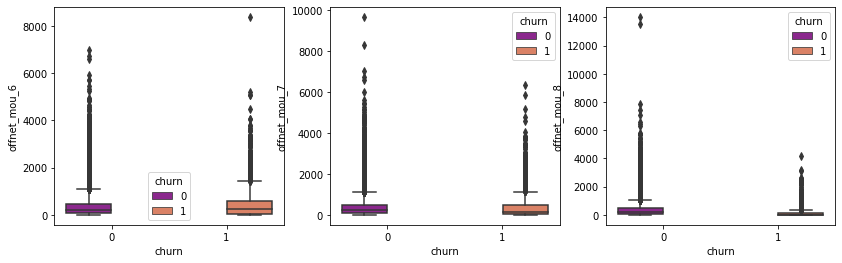

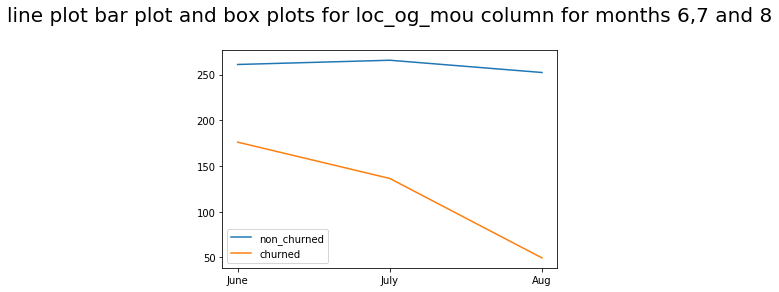

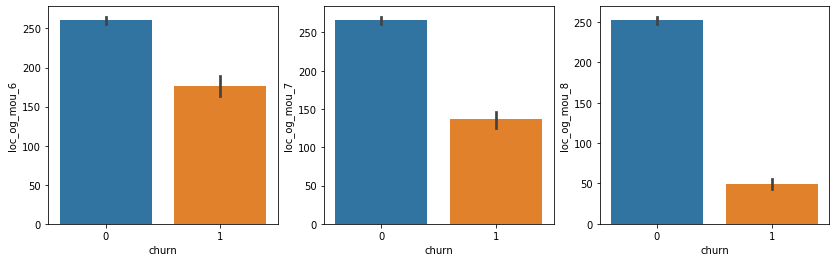

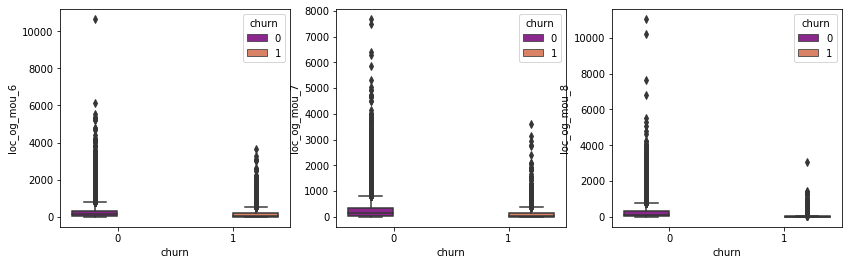

In [62]:
for col in colu[31:42]:
    line_plot(col)
    bar_plot(col)
    box_plot(col)

In [63]:
#std_og_t2f_mou,vol_3g_mb,sachet_2g,loc_og_t2t_mou,loc_og_mou,onnet_mou,
#loc_og_t2m_mou,total_rech_num,vol_2g_mb are following a drop from 7th month to 8th month for customer who churned 

In [64]:
#AON

In [65]:
AON=high_val_df.groupby('churn')['aon'].mean().reset_index()

In [66]:
AON

,churn,aon
0,0,1240.228120
1,1,860.952478


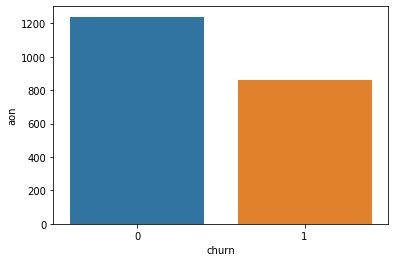

In [67]:
sns.barplot('churn','aon',data=AON)

In [68]:
#Average Age on network for churned customers is less then non churned

In [69]:
#Days of last recharge

In [70]:
DLR=high_val_df.groupby('churn')['days_last_recharge'].mean().reset_index()

In [71]:
DLR

,churn,days_last_recharge
0,0,4.049883
1,1,7.703879


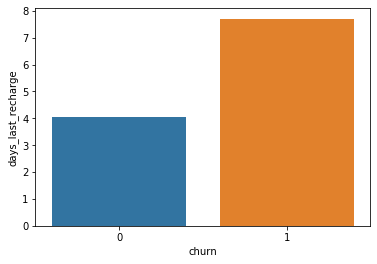

In [72]:
sns.barplot('churn','days_last_recharge',data=DLR)

In [73]:
#Average number of days of last recharge for churned customers is greater then non churned

## Outlier handling

In [155]:
#calculating Q1,Q3 and IQR to remove outlier
Q1 = high_val.quantile(0.01)
Q3 = high_val.quantile(0.99)
IQR = Q3 - Q1
#removing column values having greater than Q3+1.5*IQR or less than Q1-1.5*IQR
high_val_filtered = high_val[~((high_val < (Q1 - 1.5 * IQR)) |(high_val > (Q3 + 1.5 * IQR))).any(axis=1)]
high_val_filtered.shape

(27525, 148)

In [156]:
high_val.shape

(30001, 148)

In [157]:
#check the spread of data
def box_plot_fil(col):
    fig,ax=plt.subplots(1,3,figsize=(14, 4))
    sns.boxplot(x='churn',y=col+'_6',hue='churn',palette='plasma',data=high_val_filtered,ax=ax[0])
    sns.boxplot(x='churn',y=col+'_7',hue='churn',palette='plasma',data=high_val_filtered,ax=ax[1])
    sns.boxplot(x='churn',y=col+'_8',hue='churn',palette='plasma',data=high_val_filtered,ax=ax[2])
    plt.show()

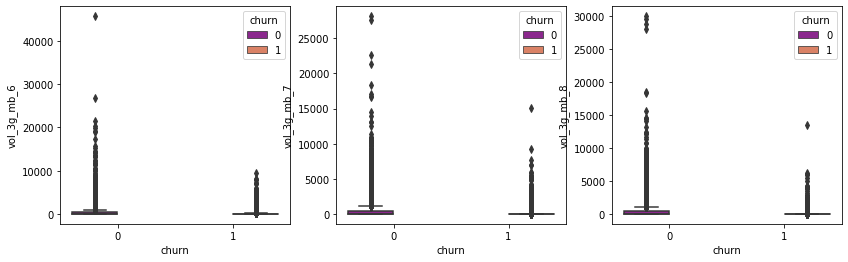

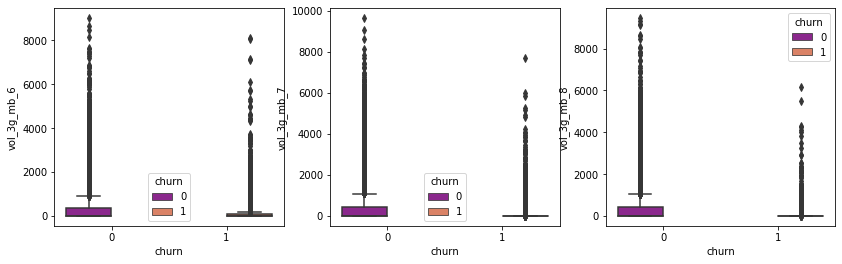

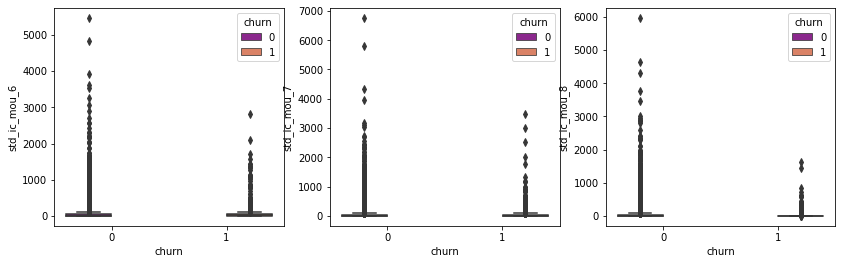

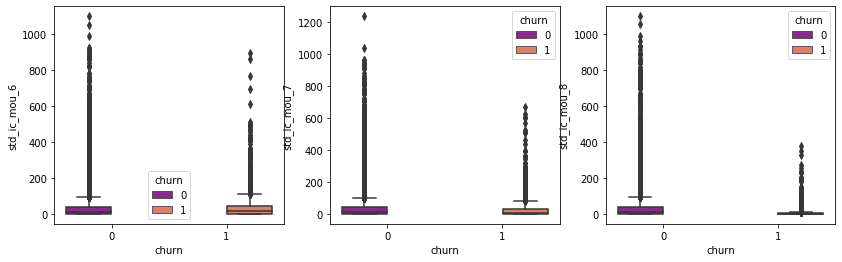

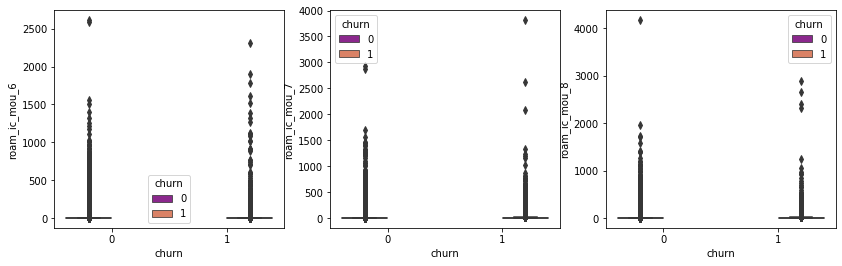

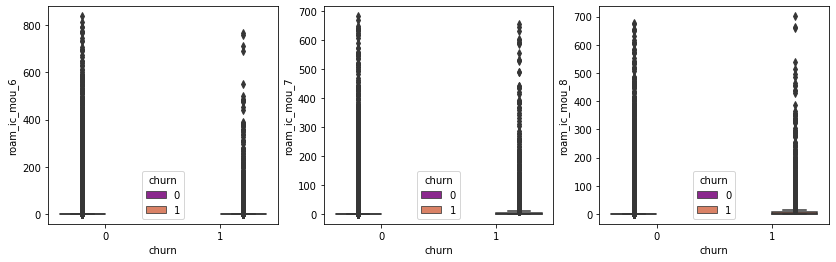

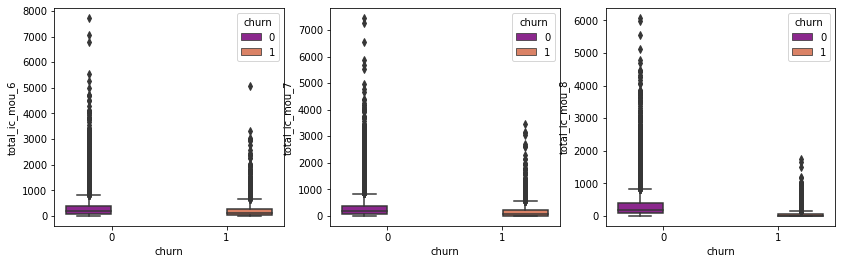

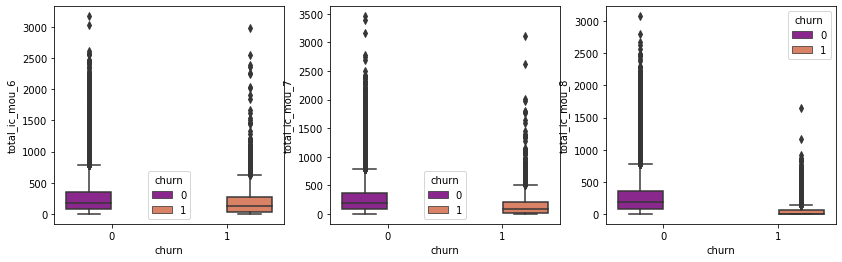

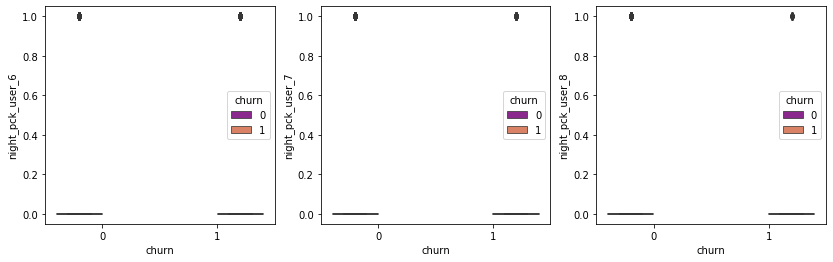

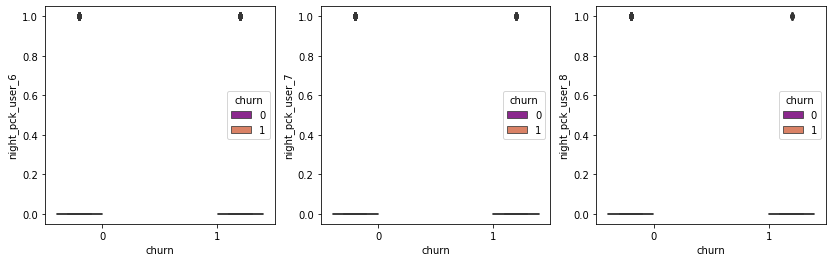

In [158]:
#compare the spread before and after handling outliers
for col in colu[:5]:
    box_plot(col)
    box_plot_fil(col)

### Data spliting

In [159]:
high_val_filtered.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_last_recharge,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,23.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0.0,0.0,0.0,802,57.74,19.38,18.74,5.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0.0,1.0,1.0,315,21.03,910.65,122.16,1.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0.0,1.0,1.0,604,40.45,51.86,0.00,7.0,0


In [160]:
#creating X dataframe by removing mobile number and target variable 
X=high_val_filtered.drop(['mobile_number','churn'],axis=1)

In [161]:
#create y using target variables
y=high_val_filtered['churn']

In [162]:
from  sklearn.model_selection import train_test_split

In [163]:
#spliting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [164]:
#preview shape of train data
X_train.shape

(19267, 146)

In [165]:
#preview the shape of test data
X_test.shape

(8258, 146)

### Handling Data imbalance by using SMOTE algorithm

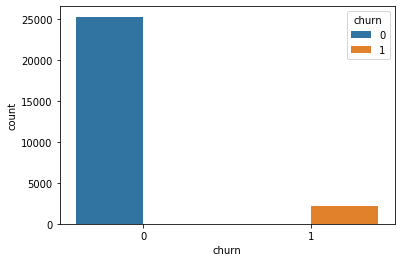

In [166]:
sns.countplot('churn',hue='churn',data=high_val_filtered)

In [167]:
100*(high_val_filtered['churn'].sum()/high_val_filtered['churn'].count())

8.087193460490463

In [168]:
from imblearn.over_sampling import SMOTE

In [169]:
sm = SMOTE(random_state = 42) 
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

In [170]:
print('Before over sampling using SMOTE, shape of X_train:',X_train.shape) 
print('Before over sampling using SMOTE, shape of y_train:',y_train.shape) 

print("Before over sampling using SMOTE, count of churn :",sum(y_train == 1))
print("Before over sampling using SMOTE, counts of non churn :",sum(y_train == 0))

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After over sampling using SMOTE, shape of X_train:',X_train_sm.shape) 
print('After over sampling using SMOTE, shape of y_train:',y_train_sm.shape) 
  
print("After over sampling using SMOTE, count of churn :" ,sum(y_train_sm == 1)) 
print("After over sampling using SMOTE, count of non churn :",sum(y_train_sm == 0))

Before over sampling using SMOTE, shape of X_train: (19267, 146)
Before over sampling using SMOTE, shape of y_train: (19267,)
Before over sampling using SMOTE, count of churn : 1573
Before over sampling using SMOTE, counts of non churn : 17694
After over sampling using SMOTE, shape of X_train: (35388, 146)
After over sampling using SMOTE, shape of y_train: (35388,)
After over sampling using SMOTE, count of churn : 17694
After over sampling using SMOTE, count of non churn : 17694


### Scaling Data

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
#instantiate standard scalar object
scaler=StandardScaler()

In [173]:
#scaling the X_train data
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train_sm),columns=X_train_sm.columns)

In [174]:
#preview trained scaled data
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_last_recharge
0,1.687278,0.369917,1.132910,0.124004,-0.469239,0.312530,3.974495,1.169011,1.131601,-0.251586,...,-0.22604,-0.174868,1.071932,1.149482,1.495792,2.851256,2.925982,2.343041,0.829929,-0.070619
1,0.017181,-0.458019,-0.502839,4.465855,2.468220,1.210225,-0.535179,-0.626981,-0.341933,-0.251586,...,-0.22604,-0.174868,-0.992536,-0.924331,-0.698719,-0.916203,-0.333383,-0.378038,-0.380625,0.290475
2,0.457266,0.535812,2.102579,2.226216,2.215943,3.829456,-0.175363,0.363870,1.744840,-0.251586,...,-0.22604,-0.174868,-0.992536,-0.924331,-0.698719,0.483369,-0.333383,-0.378038,-0.380625,-0.792808
3,-0.320523,0.433730,0.801248,-0.598758,-0.552679,-0.387113,-0.454314,-0.066530,0.044010,0.019834,...,-0.22604,1.661397,1.071932,1.149482,1.495792,-0.225042,-0.200979,0.138109,-0.259567,-0.251166
4,1.611047,-0.353384,0.556483,-0.161326,-0.407083,-0.222916,0.851265,-0.139015,0.469185,-0.251586,...,-0.22604,-0.174868,1.071932,-0.924331,-0.698719,1.422934,-0.042212,-0.378038,-0.380625,-0.973355


In [175]:
#scaling test data
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [176]:
#preview scaled test data
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_last_recharge
0,-0.088700,-0.077050,3.361397,0.400237,0.711782,1.009944,0.254191,0.732975,1.064566,-0.251586,...,1.23900,3.497662,1.071932,1.149482,1.495792,2.179645,-0.313913,0.383260,-0.003634,-0.431713
1,-0.911905,3.210297,0.194909,-0.396168,0.301886,-0.061491,-0.345601,5.522034,0.317047,-0.251586,...,-0.22604,-0.174868,-0.992536,-0.924331,-0.698719,-0.153741,-0.333383,-0.378038,-0.380625,0.109928
2,-0.887900,-0.443980,-0.314659,-0.591082,-0.578325,-0.468997,-0.558615,-0.710163,-0.571468,1.206942,...,-0.22604,-0.174868,-0.992536,-0.924331,-0.698719,-0.625248,-0.333383,-0.378038,-0.380625,2.998683
3,1.325904,1.390940,-0.594535,3.368852,3.397810,0.037678,-0.326616,-0.442336,-0.554182,-0.251586,...,-0.22604,-0.174868,-0.992536,-0.924331,-0.698719,-0.229642,-0.333383,-0.378038,-0.380625,0.651570
4,-0.525026,-0.514877,0.098087,0.352845,0.359145,0.504869,-0.663035,-0.632289,-0.358386,-0.251586,...,-0.22604,1.661397,1.071932,-0.924331,1.495792,-0.376844,-0.333383,-0.378038,-0.380625,-0.973355


### PCA

In [177]:
#importing PCA 
from sklearn.decomposition import PCA

In [178]:
#instantiate PCA object to reduce dimensions
pca=PCA(random_state=42)

In [179]:
#apply PCA on scaled train data
X_train_pca=pca.fit_transform(X_train_scaled)

In [180]:
#preview the shape
X_train_pca.shape

(35388, 146)

In [181]:
#preview explained variance ratio
pca.explained_variance_ratio_

array([1.07610754e-01, 1.03949927e-01, 6.06264567e-02, 4.75762756e-02,
       3.56470432e-02, 3.21104464e-02, 2.98585874e-02, 2.45772942e-02,
       2.24361090e-02, 2.11258425e-02, 2.03705742e-02, 1.87272032e-02,
       1.76873764e-02, 1.73558460e-02, 1.67435135e-02, 1.53978259e-02,
       1.46586088e-02, 1.37773046e-02, 1.28164438e-02, 1.13694933e-02,
       1.12836272e-02, 1.08989847e-02, 1.04948331e-02, 1.01206284e-02,
       9.93884375e-03, 9.49955932e-03, 9.36947238e-03, 9.08953234e-03,
       8.64434872e-03, 7.89819679e-03, 7.69425449e-03, 7.44039454e-03,
       7.22514847e-03, 7.07110648e-03, 6.77554458e-03, 6.71992971e-03,
       6.53060167e-03, 6.36339242e-03, 6.31459079e-03, 6.07425753e-03,
       5.93247746e-03, 5.74901712e-03, 5.64078169e-03, 5.58047174e-03,
       5.35975518e-03, 5.26930531e-03, 5.19307140e-03, 5.02930164e-03,
       4.87931359e-03, 4.82063817e-03, 4.65638939e-03, 4.54510236e-03,
       4.51053271e-03, 4.25416878e-03, 4.12087463e-03, 4.10698374e-03,
      

In [182]:
#calculate cummulative sum of the explained variance ratio
var_cum_sum=np.cumsum(pca.explained_variance_ratio_)

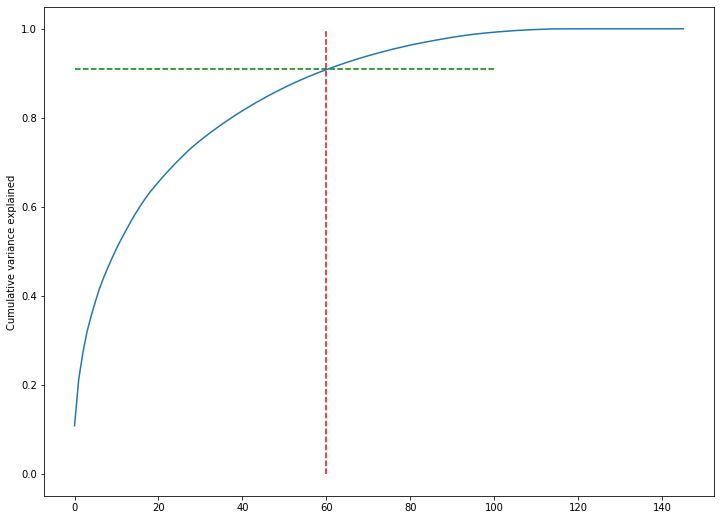

In [183]:
#Scree plot to find the number of components to be used in the PCA
fig = plt.figure(figsize=[12,9])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum_sum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [184]:
#60 components explain 91 % data

In [185]:
#performing PCA using 60 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [186]:
#transforming training data
X_train_pca=pca_final.fit_transform(X_train_scaled)

In [187]:
#previewing first 3 components of PCA
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,-0.014435,0.115848,0.098162,arpu_6
1,0.016452,0.155475,0.154579,arpu_7
2,0.081335,0.153091,0.137570,arpu_8
3,-0.089452,0.090631,0.107062,onnet_mou_6
4,-0.078431,0.108621,0.137562,onnet_mou_7
5,-0.038238,0.120136,0.132784,onnet_mou_8
6,-0.061181,0.112511,0.064751,offnet_mou_6
7,-0.046507,0.138750,0.104819,offnet_mou_7
8,0.006085,0.151662,0.098154,offnet_mou_8
9,-0.004025,0.011150,0.012998,roam_ic_mou_6


In [188]:
#preview the shape of train data after SMOTE,scaling and PCA
X_train_pca.shape

(35388, 60)

In [189]:
#check the collinearity after PCA which should be nearing to 0
corrmat=np.corrcoef(X_train_pca.transpose()).round(4)

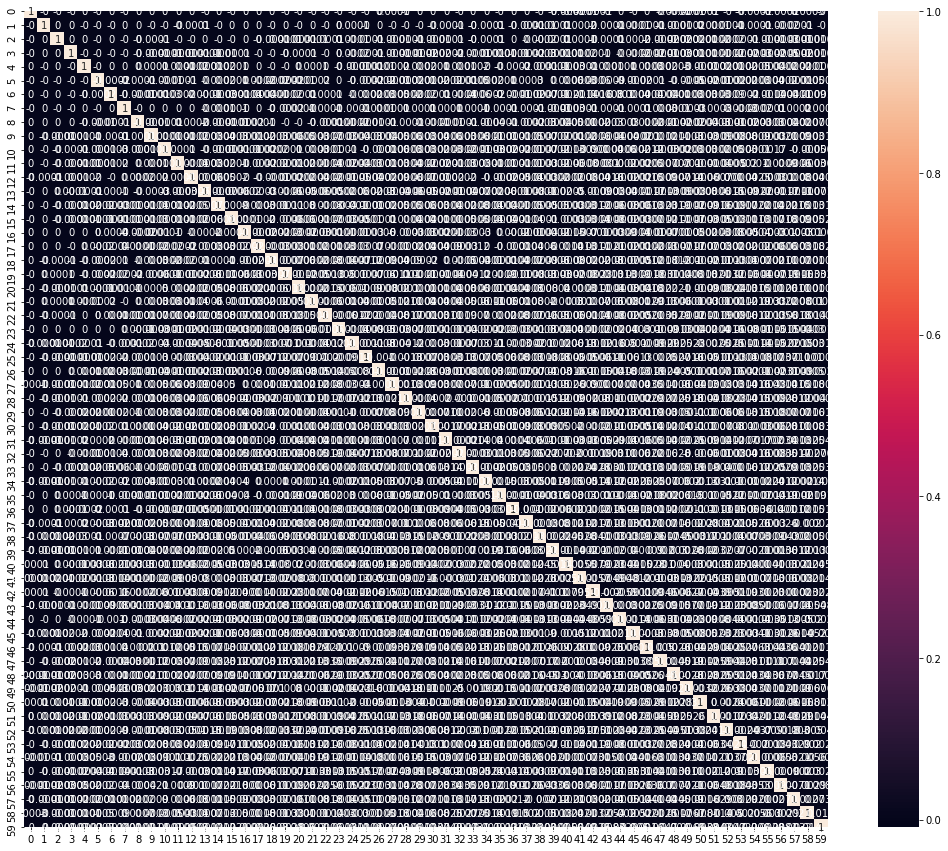

In [190]:
#heatmap
plt.figure(figsize=[18,15])
sns.heatmap(corrmat,annot=True)

In [191]:
#max and min of the correlation after PCA
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.014 , min corr:  -0.009


In [192]:
#applying PCA on test data
X_test_pca=pca_final.transform(X_test_scaled)

In [193]:
#preview the shape of test data
X_test_pca.shape

(8258, 60)

## Model Building using data after performing SMOTE and PCA

In [194]:
#importing model evaluation metrics
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,recall_score,roc_curve

In [195]:
#function which plot ROC curve using actual and predicted values
def draw_roc( y_test, y_pred ):
    fpr, tpr, thresholds = roc_curve( y_test, y_pred,drop_intermediate = False )
    auc_score = roc_auc_score( y_test, y_pred )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [196]:
#function which show accuracy score,classification report,confusion matrix,specificity,sensitivity
def get_metric_results(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print("\nThe accuracy for Model is:",accuracy_score(y_test,y_pred))
    print('roc = ',roc_auc_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    TP = (confusion_matrix(y_test,y_pred))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("\nNot-Churn Accuracy Rate:(Specificity): ",(TP/(TP+FP)))
    print("\nChurn Accuracy Rate:(Sensitivity): ",(TN/(TN+FN)))

#### LogisticRegression

In [197]:
#import Logisitic Regression
from sklearn.linear_model import LogisticRegression

In [198]:
#instatiate LogisticRegression object
lr = LogisticRegression(random_state=42)
#fit the model
model_lr = lr.fit(X_train_pca, y_train_sm)

In [199]:
#predict on train data
y_train_pred = model_lr.predict(X_train_pca)

In [200]:
#get model evaluation metrics for Logisitic regression model on train
get_metric_results(y_train_sm,y_train_pred)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     17694
           1       0.83      0.87      0.85     17694

    accuracy                           0.85     35388
   macro avg       0.85      0.85      0.85     35388
weighted avg       0.85      0.85      0.85     35388


The accuracy for Model is: 0.8484514524697637
roc =  0.8484514524697637
[[14628  3066]
 [ 2297 15397]]

Not-Churn Accuracy Rate:(Specificity):  0.8267209223465581

Churn Accuracy Rate:(Sensitivity):  0.8701819825929694


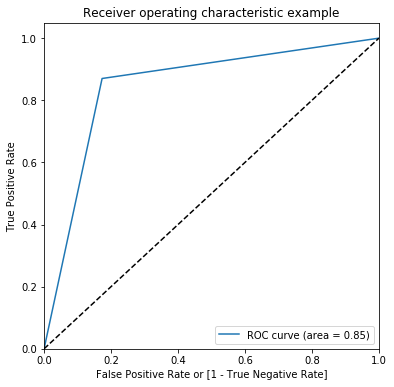

In [201]:
#ROC for Logisitic regression model
draw_roc(y_train_sm,y_train_pred)

In [202]:
#predict on test data
y_pred = model_lr.predict(X_test_pca)

In [203]:
#get model evaluation metrics for Logisitic regression model
get_metric_results(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7605
           1       0.29      0.82      0.43       653

    accuracy                           0.83      8258
   macro avg       0.64      0.83      0.66      8258
weighted avg       0.93      0.83      0.86      8258


The accuracy for Model is: 0.8264713005570355
roc =  0.8252913524087985
[[6287 1318]
 [ 115  538]]

Not-Churn Accuracy Rate:(Specificity):  0.8266929651545036

Churn Accuracy Rate:(Sensitivity):  0.8238897396630934


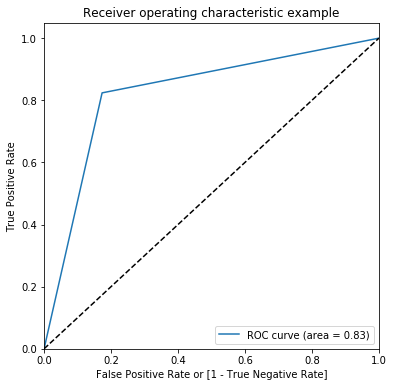

In [204]:
#ROC for Logisitic regression model
draw_roc(y_test,y_pred)

#### SVM

In [205]:
#import SVC
from sklearn.svm import SVC

In [206]:
#instatiate SVC object
svc=SVC(random_state=42)

In [207]:
#fit the model
model_svc=svc.fit(X_train_pca, y_train_sm)

In [208]:
#predict on train data
y_train_pred = model_svc.predict(X_train_pca)

In [209]:
get_metric_results(y_train_sm,y_train_pred)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     17694
           1       0.92      0.96      0.94     17694

    accuracy                           0.94     35388
   macro avg       0.94      0.94      0.94     35388
weighted avg       0.94      0.94      0.94     35388


The accuracy for Model is: 0.9399796541200407
roc =  0.9399796541200407
[[16231  1463]
 [  661 17033]]

Not-Churn Accuracy Rate:(Specificity):  0.9173166044987001

Churn Accuracy Rate:(Sensitivity):  0.9626427037413813


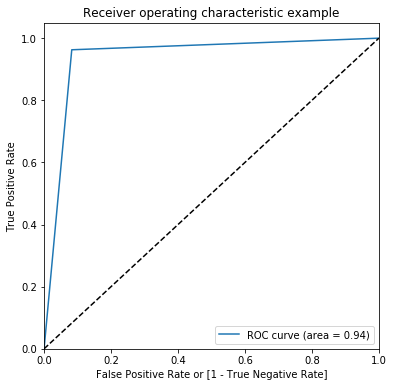

In [210]:
#ROC for SVC model
draw_roc(y_train_sm,y_train_pred)

In [211]:
#predict on test data
y_pred=model_svc.predict(X_test_pca)

In [212]:
#get model evaluation metrics for SVC model
get_metric_results(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7605
           1       0.40      0.71      0.51       653

    accuracy                           0.89      8258
   macro avg       0.69      0.81      0.73      8258
weighted avg       0.93      0.89      0.91      8258


The accuracy for Model is: 0.89319447808186
roc =  0.8090212270681113
[[6913  692]
 [ 190  463]]

Not-Churn Accuracy Rate:(Specificity):  0.9090072320841551

Churn Accuracy Rate:(Sensitivity):  0.7090352220520674


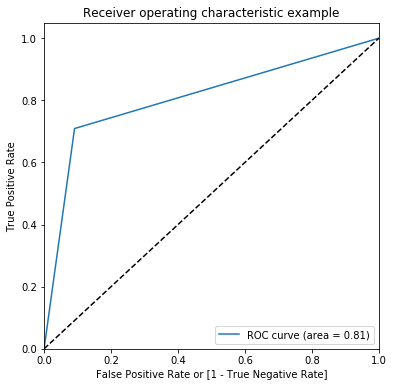

In [213]:
#ROC for SVC model
draw_roc(y_test,y_pred)

### RandomForest

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
#randomforest with default params
model_rf = RandomForestClassifier()

In [216]:
#fit the model
model_rf.fit(X_train_pca,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [217]:
#predict on test data
y_pred=model_rf.predict(X_test_pca)

In [218]:
#evaluation metrics
get_metric_results(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7605
           1       0.47      0.54      0.50       653

    accuracy                           0.92      8258
   macro avg       0.71      0.74      0.73      8258
weighted avg       0.92      0.92      0.92      8258


The accuracy for Model is: 0.9153548074594333
roc =  0.7440582231605909
[[7206  399]
 [ 300  353]]

Not-Churn Accuracy Rate:(Specificity):  0.947534516765286

Churn Accuracy Rate:(Sensitivity):  0.5405819295558959


In [219]:
#Hypertuning the params

In [220]:
#import Grid search and KFolds for tuning the hyperparameters
from sklearn.model_selection import KFold,GridSearchCV

In [221]:
#perform grid search to find best hyperparameters for randomforest

r_model = RandomForestClassifier()
params = {
    'max_features': range(10, 100, 20),
    'n_estimators': [50,100,150],
    'min_samples_leaf': range(100, 200, 50),
    'min_samples_split': range(100, 200, 50),
    'max_depth': [5,10]
}

folds = KFold(n_splits=3, shuffle=True, random_state=42)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(X_train_pca,y_train_sm)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 16.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fr...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
    

In [222]:
#best params
grid_cv1.best_params_

{'max_depth': 10,
 'max_features': 30,
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 150}

In [282]:
#instatiate model with best params
model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=150,
                                  n_estimators=150,
                                  oob_score = True, n_jobs = -1,
                                  random_state =42,
                                  max_features = 30)

In [283]:
#fit the model
model_rf.fit(X_train_pca,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [284]:
#predict on test data
y_pred=model_rf.predict(X_test_pca)

In [285]:
#evaluation metrics
get_metric_results(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7605
           1       0.35      0.76      0.48       653

    accuracy                           0.87      8258
   macro avg       0.66      0.82      0.70      8258
weighted avg       0.93      0.87      0.89      8258


The accuracy for Model is: 0.8703075805279729
roc =  0.8203935107575113
[[6690  915]
 [ 156  497]]

Not-Churn Accuracy Rate:(Specificity):  0.8796844181459567

Churn Accuracy Rate:(Sensitivity):  0.7611026033690659


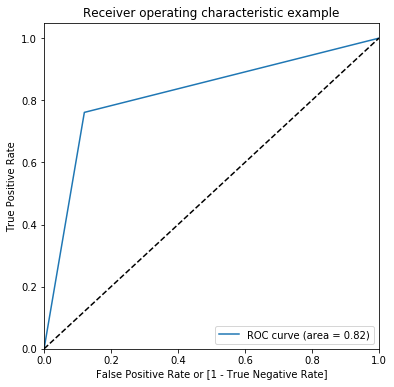

In [286]:
#ROC for random forest model
draw_roc(y_test,y_pred)

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

### ADAboost

In [229]:
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [230]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
ABC = AdaBoostClassifier(
    base_estimator=tree,
    random_state=42,
    learning_rate=0.6,
    algorithm="SAMME")

In [231]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               n_jobs=-1,
                               return_train_score=True,                         
                               verbose = 1)


In [232]:
grid_search_ABC.fit(X_train_pca, y_train_sm)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed: 10.8min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 14.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
   

In [233]:
grid_search_ABC.best_params_

{'base_estimator__max_depth': 5, 'n_estimators': 600}

In [234]:
tree = DecisionTreeClassifier(max_depth=5)
ABC = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    random_state=42,
    learning_rate=0.6,
    algorithm="SAMME")

In [235]:
model_ada=ABC.fit(X_train_pca,y_train_sm)
y_pred=model_ada.predict(X_test_pca)

In [236]:
get_metric_results(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7605
           1       0.44      0.59      0.50       653

    accuracy                           0.91      8258
   macro avg       0.70      0.76      0.73      8258
weighted avg       0.92      0.91      0.91      8258


The accuracy for Model is: 0.9083313150883991
roc =  0.7633433110521107
[[7115  490]
 [ 267  386]]

Not-Churn Accuracy Rate:(Specificity):  0.9355687047994741

Churn Accuracy Rate:(Sensitivity):  0.5911179173047473


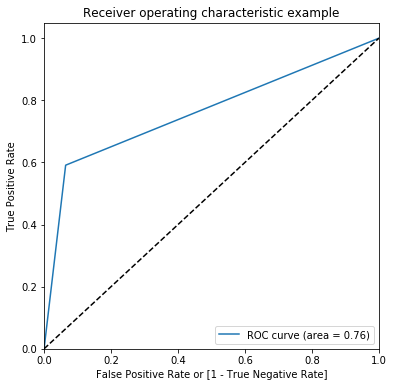

In [237]:
draw_roc(y_test,y_pred)

### XGBoost

In [238]:
# hyperparameter tuning with XGBoost

In [239]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2,random_state=42,n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

In [240]:
# fit the model
model_cv.fit(X_train_pca,y_train_sm)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:   46.7s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [241]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [242]:
xgb_model = XGBClassifier(max_depth=2,learning_rate= 0.6,random_state=42,subsample=0.9,n_estimators=200)

In [243]:
model_xgb=xgb_model.fit(X_train_pca,y_train_sm)
y_pred=model_xgb.predict(X_test_pca)

In [244]:
get_metric_results(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7605
           1       0.35      0.73      0.47       653

    accuracy                           0.87      8258
   macro avg       0.66      0.81      0.70      8258
weighted avg       0.93      0.87      0.89      8258


The accuracy for Model is: 0.8713974327924436
roc =  0.8069862154442199
[[6719  886]
 [ 176  477]]

Not-Churn Accuracy Rate:(Specificity):  0.8834976988823142

Churn Accuracy Rate:(Sensitivity):  0.7304747320061256


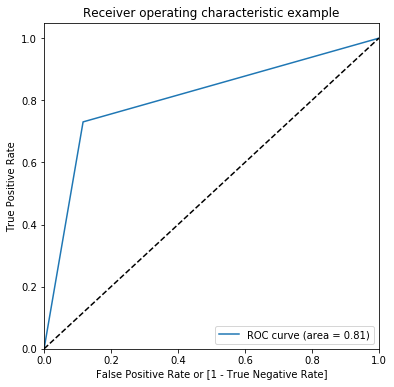

In [245]:
draw_roc(y_test,y_pred)

### Model Building using data without SMOTE and PCA

### LogisticRegression

In [246]:
#creating X dataframe by removing mobile number and target variable 
X_withoutsm=high_val_filtered.drop(['mobile_number','churn'],axis=1)
#creating target variable
y_withoutsm=high_val_filtered['churn']
#spliting the data
X_train_wtoutsm,X_test_wtoutsm,y_train_wtoutsm,y_test_wtoutsm=train_test_split(X_withoutsm,y_withoutsm)


In [247]:
#instantiate logisticRegression object
lr=LogisticRegression(random_state=42)

In [248]:
#fit the model
model_lr=lr.fit(X_train_wtoutsm,y_train_wtoutsm)
#predict the model
y_pred_wtoutsm=model_lr.predict(X_test_wtoutsm)

In [249]:
#evaluation metrics
get_metric_results(y_test_wtoutsm,y_pred_wtoutsm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6339
           1       0.63      0.35      0.45       543

    accuracy                           0.93      6882
   macro avg       0.79      0.67      0.71      6882
weighted avg       0.92      0.93      0.92      6882


The accuracy for Model is: 0.932868352223191
roc =  0.6671983224082436
[[6229  110]
 [ 352  191]]

Not-Churn Accuracy Rate:(Specificity):  0.9826471052216438

Churn Accuracy Rate:(Sensitivity):  0.35174953959484345


In [250]:
#model is providing good accuracy but poor Sensitivity
#so imbalance data have to be treated since prediction of customer to be churned is important

## Model Building using data with only SMOTE

### XGBoost

In [251]:
# creating a KFold object 
folds = KFold(n_splits=5,shuffle=True,random_state=42)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2,random_state=42,n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

In [252]:
# fit the model
model_cv.fit(X_train_sm, y_train_sm) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
        

In [253]:
#best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [254]:
#create XGBoost model with best params
xgb_model = XGBClassifier(max_depth=2,learning_rate= 0.6,random_state=42,subsample=0.9,n_estimators=100)

In [255]:
#fit the model
model_xgb=xgb_model.fit(X_train_sm, y_train_sm)
#predict on test data
y_pred_xgb=model_xgb.predict(X_test)

In [256]:
#evaluation metrics
get_metric_results(y_test,y_pred_xgb)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7605
           1       0.58      0.67      0.62       653

    accuracy                           0.93      8258
   macro avg       0.77      0.81      0.79      8258
weighted avg       0.94      0.93      0.94      8258


The accuracy for Model is: 0.9347299588278033
roc =  0.8119735645828235
[[7284  321]
 [ 218  435]]

Not-Churn Accuracy Rate:(Specificity):  0.9577909270216962

Churn Accuracy Rate:(Sensitivity):  0.666156202143951


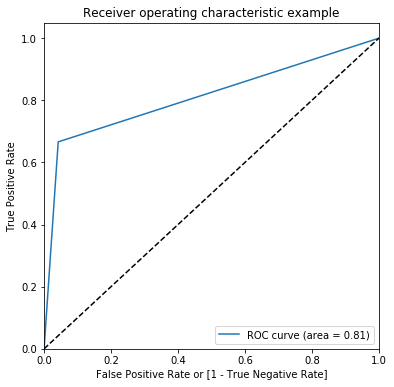

In [257]:
#ROC curve
draw_roc(y_test,y_pred_xgb)

### Decision tree

In [258]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,n_jobs=-1,
                          cv = folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [259]:
#best params
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [287]:
#build model with best params
dtc = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
dtc.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [288]:
#predict on test data
y_pred_sm=dtc.predict(X_train_sm)
#evaluate metrics on the data
get_metric_results(y_train_sm,y_pred_sm)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     17694
           1       0.92      0.93      0.92     17694

    accuracy                           0.92     35388
   macro avg       0.92      0.92      0.92     35388
weighted avg       0.92      0.92      0.92     35388


The accuracy for Model is: 0.9232508194868317
roc =  0.9232508194868317
[[16162  1532]
 [ 1184 16510]]

Not-Churn Accuracy Rate:(Specificity):  0.9134169775064994

Churn Accuracy Rate:(Sensitivity):  0.933084661467164


In [289]:
#predict on test data
y_pred_sm=dtc.predict(X_test)
#evaluate metrics on the data
get_metric_results(y_test,y_pred_sm)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7605
           1       0.40      0.75      0.52       653

    accuracy                           0.89      8258
   macro avg       0.69      0.83      0.73      8258
weighted avg       0.93      0.89      0.91      8258


The accuracy for Model is: 0.8929522886897554
roc =  0.8263884987409549
[[6886  719]
 [ 165  488]]

Not-Churn Accuracy Rate:(Specificity):  0.905456936226167

Churn Accuracy Rate:(Sensitivity):  0.7473200612557427


### random forest

In [263]:
#perform grid search to find best hyperparameters
r_model = RandomForestClassifier()
params = {
    'max_features': [30,50],
    'n_estimators': [100,150],
    'min_samples_leaf': [100,150],
    'min_samples_split': [100,150],
    'max_depth': [3]
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fr...eaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=Fal

In [264]:
#best params
grid_cv1.best_params_

{'max_depth': 3,
 'max_features': 50,
 'min_samples_leaf': 150,
 'min_samples_split': 150,
 'n_estimators': 100}

In [266]:
#instatiate model with best params
model_rf_sm = RandomForestClassifier(bootstrap=True,
                                  max_depth=3,
                                  min_samples_leaf=100, 
                                  min_samples_split=150,
                                  n_estimators=150,
                                  oob_score = True, n_jobs = -1,
                                  random_state =42,
                                  max_features = 50)

In [267]:
#fit the model
model_rf_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [268]:
#predict on test data
y_pred_sm=model_rf_sm.predict(X_train_sm)
#evaluate metrics on the data
get_metric_results(y_train_sm,y_pred_sm)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     17694
           1       0.89      0.86      0.87     17694

    accuracy                           0.88     35388
   macro avg       0.88      0.88      0.88     35388
weighted avg       0.88      0.88      0.88     35388


The accuracy for Model is: 0.8758053577483893
roc =  0.8758053577483893
[[15710  1984]
 [ 2411 15283]]

Not-Churn Accuracy Rate:(Specificity):  0.8878715948909235

Churn Accuracy Rate:(Sensitivity):  0.8637391206058551


In [269]:
#predict on test data
y_pred_rf=model_rf_sm.predict(X_test)
#evaluate metrics on the data
get_metric_results(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7605
           1       0.38      0.79      0.51       653

    accuracy                           0.88      8258
   macro avg       0.68      0.84      0.72      8258
weighted avg       0.93      0.88      0.90      8258


The accuracy for Model is: 0.8795107774279487
roc =  0.837989333607192
[[6748  857]
 [ 138  515]]

Not-Churn Accuracy Rate:(Specificity):  0.8873109796186719

Churn Accuracy Rate:(Sensitivity):  0.7886676875957122


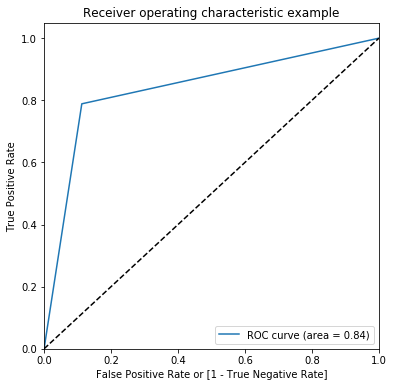

In [270]:
#ROC curve
draw_roc(y_test,y_pred_rf)

In [271]:
#creating a dataframe with coefficients
driving_df_rf=pd.DataFrame(model_rf_sm.feature_importances_.T,index=X_train_sm.columns,columns=['coefficient']).sort_values(by='coefficient',ascending=False)
#creating a columns with absolute value of the coefficient
driving_df_rf['abs_coeff']=abs(driving_df_rf['coefficient'])
#top 20 driving variables
driving_df_rf.sort_values(by='abs_coeff',ascending=False).head(20)

,coefficient,abs_coeff
total_rech_amt_8,0.211281,0.211281
loc_ic_mou_8,0.127478,0.127478
roam_og_mou_8,0.125262,0.125262
total_ic_mou_8,0.123395,0.123395
loc_ic_t2m_mou_8,0.085637,0.085637
roam_ic_mou_8,0.071903,0.071903
fb_user_8,0.058715,0.058715
arpu_8,0.055157,0.055157
days_last_recharge,0.029572,0.029572
loc_og_mou_8,0.024959,0.024959


### Summary of models

- Without doing smote analysis and PCA
 - Logisitic model produced decent accuracy(around 93%) but it was not able to identify customer about to churn.
- With SMOTE and PCA
 - Logisitic model produced a good result having good accuracy(83%) and sensitivity(82%)
 - next best model was produced by random forest with good accuracy(87%) but less sensitivity(76%) than Logisitic model 
 - Ababoost model produced result with accuracy nearing to 92% but low sensitivity and recall
 - SVM also produced similar results with good accuracy and less sensitivity
- With SMOTE and without PCA
 - Random forest produced good results with accuracy (88%) and sensitivity(79%)
 - Decision Tree produced results with accuracy (89%) and sensitivity(75%)

### Important and driving features

In [272]:
driving_df_rf.head(15) # given by random forest since that model has better 

,coefficient,abs_coeff
total_rech_amt_8,0.211281,0.211281
loc_ic_mou_8,0.127478,0.127478
roam_og_mou_8,0.125262,0.125262
total_ic_mou_8,0.123395,0.123395
loc_ic_t2m_mou_8,0.085637,0.085637
roam_ic_mou_8,0.071903,0.071903
fb_user_8,0.058715,0.058715
arpu_8,0.055157,0.055157
days_last_recharge,0.029572,0.029572
loc_og_mou_8,0.024959,0.024959


- total_rech_amt_8 
- total_ic_mou_8
- roam_og_mou_8
- loc_ic_t2m_mou_8
- roam_ic_mou_8
- arpu_8
- loc_ic_mou_8
- fb_user_8
- days_last_recharge
- max_rech_amt_8

## Recommendations

- Company have to identify the customer with following trends and provide offers to them to retain them
  - drastic decrease in total recharge amount in a span of one month (like 1000 to below 400)
  - Decrease in total incoming calls, roam outgoing calls, local incoming calls, fb pack usage 
  - huge decrease in average revenue from user
  - Increase in number days from last recharge
  